## 📁 Visualizações de Dados - Cursos de Computação

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

dados = pd.read_excel('dados_UFV_comp_VD.xlsx', engine='openpyxl')

In [2]:
dados.head()

,Identificador,Ano_Nascimento,Sexo,Campus,Curso_Identificador,Curso,UF_Nascimento,Municipio_Nascimento,Admissao,Saida,...,End_Municipio,End_UF,Intervalo_ENEM,Intervalo_CRA,Regiao_Nascimento,Regiao_End,Intervalo_Ano_Nascimento,Ano_Admissao,Ano_Saida,entrada_pandemia
0,112343,1996,M,CAV,1141,CAV - Ciência da Computação,MG,Coronel Fabriciano,2015/1,2023/2,...,Belo Oriente,MG,600.0-700.0,50.0-60.0,Sudeste,Sudeste,1990-1999,2015,2023.0,Nao
1,128409,1996,F,CAV,1141,CAV - Ciência da Computação,MG,Ipatinga,2016/1,2022/2,...,Ipatinga,MG,600.0-700.0,60.0-70.0,Sudeste,Sudeste,1990-1999,2016,2022.0,Nao
2,139167,1982,M,CAV,1141,CAV - Ciência da Computação,MG,Coronel Fabriciano,2017/1,2017/1,...,Timoteo,MG,700.0-800.0,0-10,Sudeste,Sudeste,1980-1989,2017,2017.0,Nao
3,82002,1993,M,CAV,1141,CAV - Ciência da Computação,BA,Cruz das Almas,2011/1,2011/1,...,Cruz das Almas,BA,NaN,60.0-70.0,Nordeste,Nordeste,1990-1999,2011,2011.0,Nao
4,112368,1996,M,CAV,1141,CAV - Ciência da Computação,MG,Viçosa,2015/1,2021/2,...,Viçosa,MG,NaN,50.0-60.0,Sudeste,Sudeste,1990-1999,2015,2021.0,Nao


In [3]:
for coluna in dados.columns:
    valores_unicos = dados[coluna].unique()
    print(f"Coluna: {coluna}")
    print(valores_unicos)
    print("-" * 100)

Coluna: Identificador
[  112343   128409   139167 ... 30011448 30011462 30011463]
----------------------------------------------------------------------------------------------------
Coluna: Ano_Nascimento
[1996 1982 1993 1991 1990 1986 2001 2005 2004 1995 1988 2002 2000 1981
 1992 1999 1994 1987 1997 1998 1985 1984 1983 1978 2003 1989 1958 1980
 1979 1977 1974 1971 1955 1976 1975 1970 1973 1967 1972 1964 1969 1962]
----------------------------------------------------------------------------------------------------
Coluna: Sexo
['M' 'F']
----------------------------------------------------------------------------------------------------
Coluna: Campus
['CAV' 'CAF' 'CRP']
----------------------------------------------------------------------------------------------------
Coluna: Curso_Identificador
[1141 2107 3104 3105]
----------------------------------------------------------------------------------------------------
Coluna: Curso
['CAV - Ciência da Computação' 'CAF - Ciência da Compu

In [4]:
# Remover linhas com valores nulos na coluna 'CRA'
dados = dados.dropna(subset=['CRA'])

In [5]:
# Remover linhas com valores nulos na coluna 'UF_Nascimento'
dados = dados.dropna(subset=['UF_Nascimento'])

In [6]:
# Remover linhas com valores nulos na coluna 'Regiao_Nascimento'
dados = dados.dropna(subset=['Regiao_Nascimento'])

### 📚 Perguntas Iniciais

### 1️⃣ Qual é a distribuição dos alunos por campus?


In [7]:
# Contar a quantidade de alunos em cada campus
contagem_campi = dados['Campus'].value_counts()

# Exibir os resultados
print(contagem_campi)

Campus
CRP    1520
CAV    1101
CAF     624
Name: count, dtype: int64


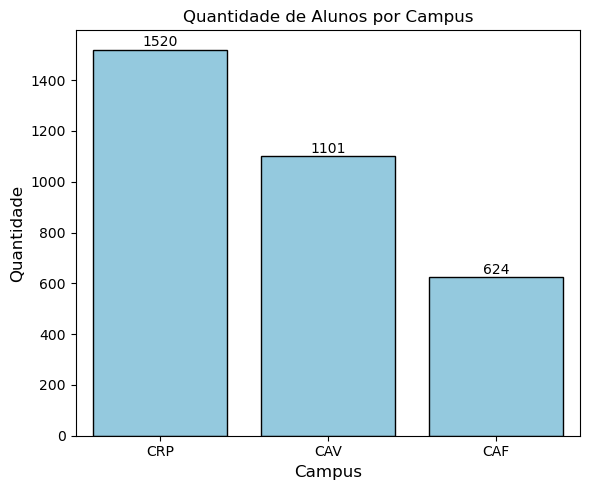

In [8]:
# Contar os valores para Campus
contagem_campi = dados['Campus'].value_counts().reset_index()
contagem_campi.columns = ['Campus', 'Quantidade']

# Criar gráfico de barras com Seaborn
plt.figure(figsize=(6, 5))
ax = sns.barplot(data=contagem_campi, x='Campus', y='Quantidade', color='skyblue', edgecolor='black')

# Adicionar os valores acima de cada barra
for p in ax.patches:
    altura = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, altura + 1,
            int(altura), ha='center', va='bottom', fontsize=10)

# Personalizar o gráfico
plt.title('Quantidade de Alunos por Campus', fontsize=12)
plt.xlabel('Campus', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 2️⃣ Qual é o perfil demográfico dos alunos?


### Como se distribuem os alunos por gênero, estado de origem e raça? 

#### Geral

In [9]:
# Estado de origem (nascimento)
# Lista de valores inválidos (olhar na célula de valores únicos acima) - FILTRANDO RETIRANDO ESTADOS QUE NÃO EXISTEM
valores_invalidos = ['NJ', 'AP', ' ', '  ']

# Filtrar o DataFrame para excluir linhas com valores inválidos na coluna UF_Nascimento
dados_filtrados_UF = dados[~dados['UF_Nascimento'].isin(valores_invalidos)]

# Verificar os valores únicos após a filtragem
print(dados_filtrados_UF['UF_Nascimento'].unique())

['MG' 'BA' 'ES' 'RJ' 'RS' 'SP' 'MS' 'DF' 'GO' 'PR' 'CE' 'RO' 'PA' 'MA'
 'SE' 'AM' 'RR' 'PE' 'AL' 'RN' 'MT']



Quantidade de alunos por sexo:
Sexo
M    2769
F     476
Name: count, dtype: int64

Quantidade de alunos por UF de nascimento:
UF_Nascimento
MG    2694
SP     220
ES      98
RJ      94
BA      42
DF      26
GO      16
PR      14
RS       8
MA       8
MT       4
RO       3
PA       3
AM       3
MS       2
SE       2
AL       2
CE       2
RR       1
PE       1
RN       1
Name: count, dtype: int64

Quantidade de alunos por raça:
Raca
Branco(a)                    1287
Pardo(a)                      863
Informação não disponível     842
Preto(a)                      201
Amarelo(a)                     40
Indígena                       12
Name: count, dtype: int64


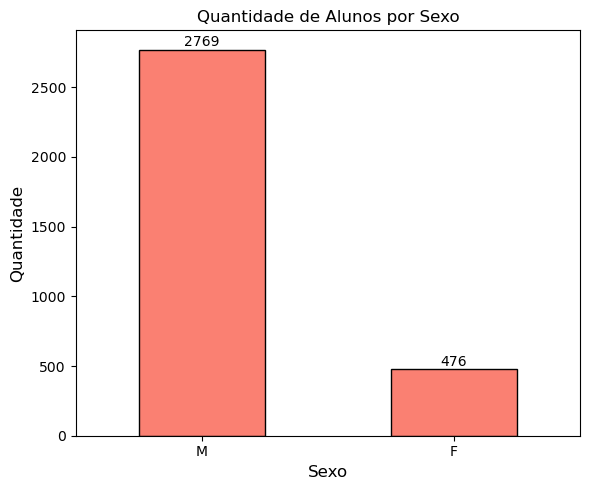

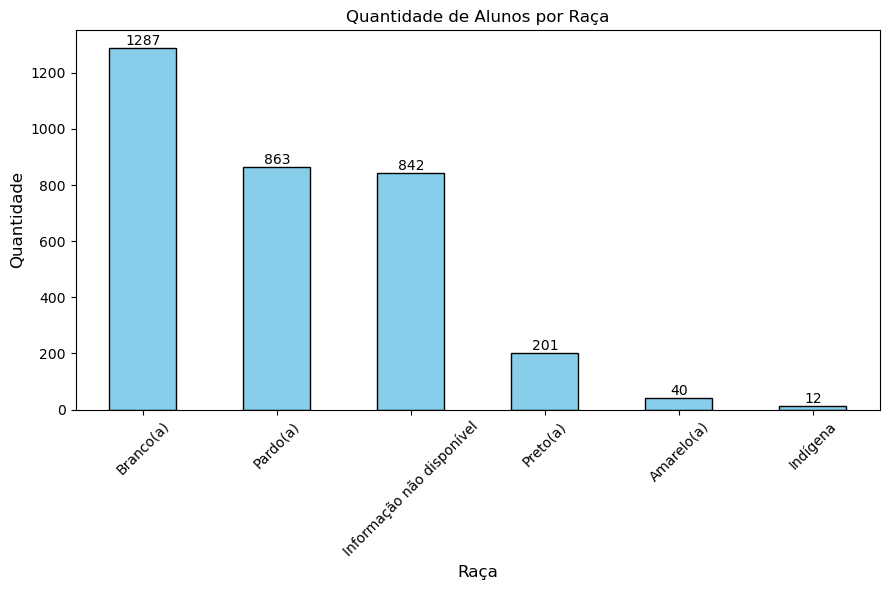

In [10]:
# Contagem de alunos por sexo
contagem_sexo = dados['Sexo'].value_counts()
print("\nQuantidade de alunos por sexo:")
print(contagem_sexo)

# Contagem de alunos por UF de nascimento
contagem_uf = dados_filtrados_UF['UF_Nascimento'].value_counts()
print("\nQuantidade de alunos por UF de nascimento:")
print(contagem_uf)

# Contagem de alunos por raça
contagem_raca = dados['Raca'].value_counts()
print("\nQuantidade de alunos por raça:")
print(contagem_raca)

# Criar gráfico de barras para Sexo
plt.figure(figsize=(6, 5))
ax1 = contagem_sexo.plot(kind='bar', color='salmon', edgecolor='black')
for p in ax1.patches:
    ax1.text(p.get_x() + p.get_width() / 2, p.get_height() + 1,
             int(p.get_height()), ha='center', va='bottom', fontsize=10)
plt.title(f'Quantidade de Alunos por Sexo', fontsize=12)
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Criar gráfico de barras para Raça
plt.figure(figsize=(9, 6))
ax3 = contagem_raca.plot(kind='bar', color='skyblue', edgecolor='black')
for p in ax3.patches:
    ax3.text(p.get_x() + p.get_width() / 2, p.get_height() + 1,
             int(p.get_height()), ha='center', va='bottom', fontsize=10)
plt.title(f'Quantidade de Alunos por Raça', fontsize=12)
plt.xlabel('Raça', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Por campus


Contagem de Alunos - Campus CAV
Sexo:
Sexo
M    969
F    132
Name: count, dtype: int64

UF de Nascimento:
UF_Nascimento
MG    849
ES     82
SP     57
RJ     49
BA     28
DF      9
PR      6
RS      4
MA      4
GO      2
PA      2
SE      2
MS      1
CE      1
RO      1
AM      1
RR      1
PE      1
Name: count, dtype: int64

Raça:
Raca
Informação não disponível    409
Branco(a)                    385
Pardo(a)                     243
Preto(a)                      56
Indígena                       4
Amarelo(a)                     4
Name: count, dtype: int64


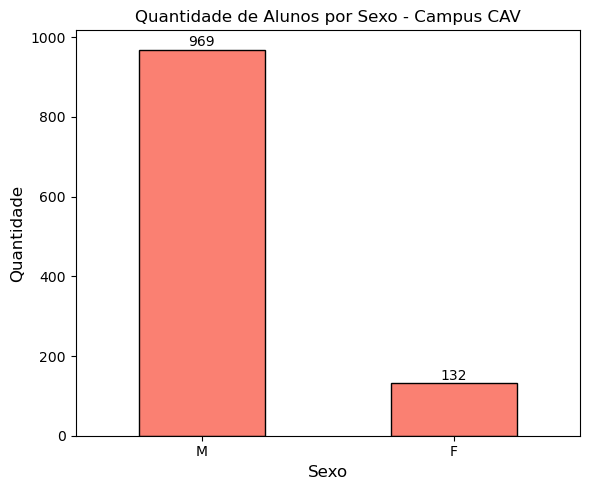

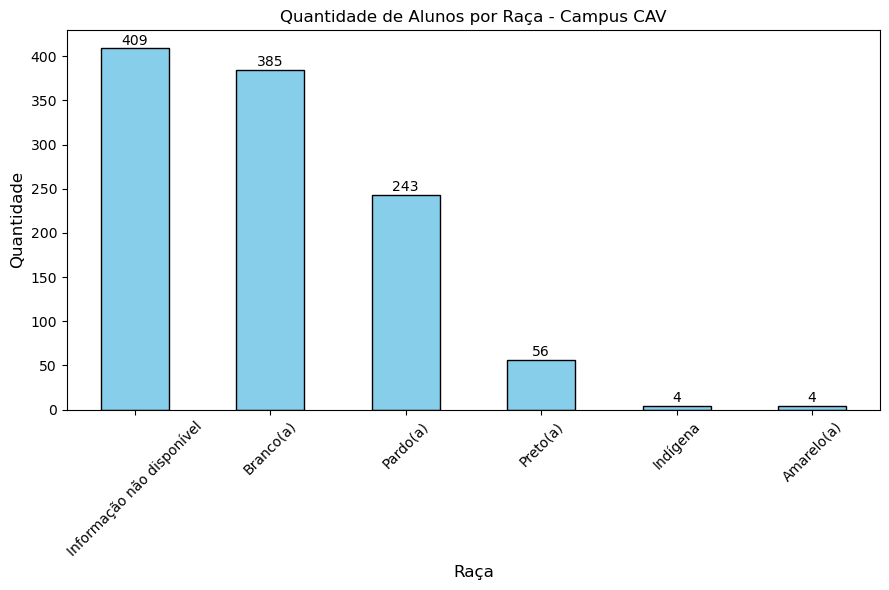


Contagem de Alunos - Campus CAF
Sexo:
Sexo
M    531
F     93
Name: count, dtype: int64

UF de Nascimento:
UF_Nascimento
MG    566
SP     28
RJ     16
ES      6
RO      2
AL      1
RN      1
PA      1
MT      1
RS      1
DF      1
Name: count, dtype: int64

Raça:
Raca
Branco(a)                    239
Pardo(a)                     209
Informação não disponível    129
Preto(a)                      34
Amarelo(a)                     9
Indígena                       4
Name: count, dtype: int64


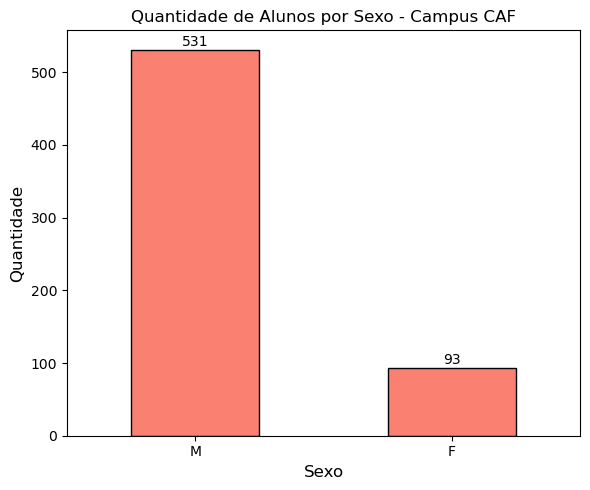

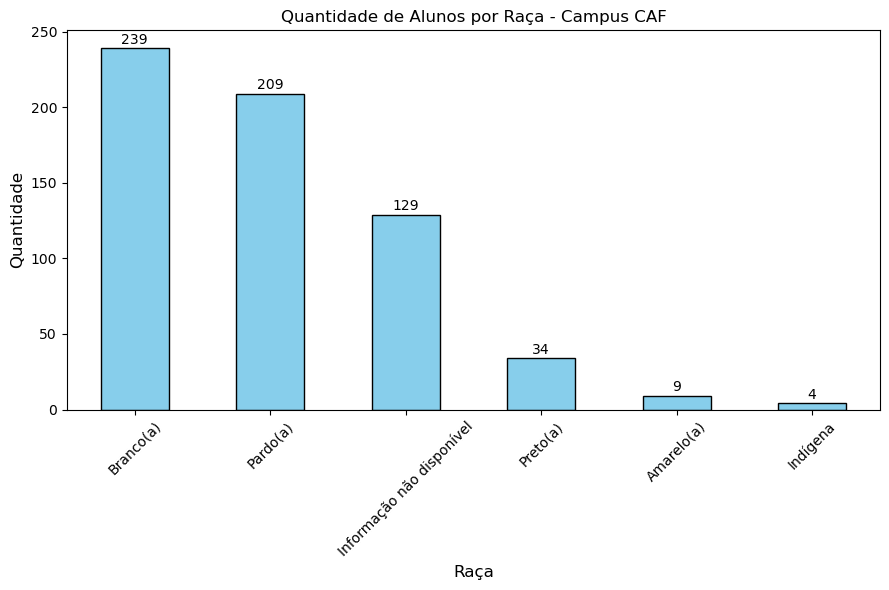


Contagem de Alunos - Campus CRP
Sexo:
Sexo
M    1269
F     251
Name: count, dtype: int64

UF de Nascimento:
UF_Nascimento
MG    1279
SP     135
RJ      29
DF      16
GO      14
BA      14
ES      10
PR       8
MA       4
MT       3
RS       3
AM       2
MS       1
AL       1
CE       1
Name: count, dtype: int64

Raça:
Raca
Branco(a)                    663
Pardo(a)                     411
Informação não disponível    304
Preto(a)                     111
Amarelo(a)                    27
Indígena                       4
Name: count, dtype: int64


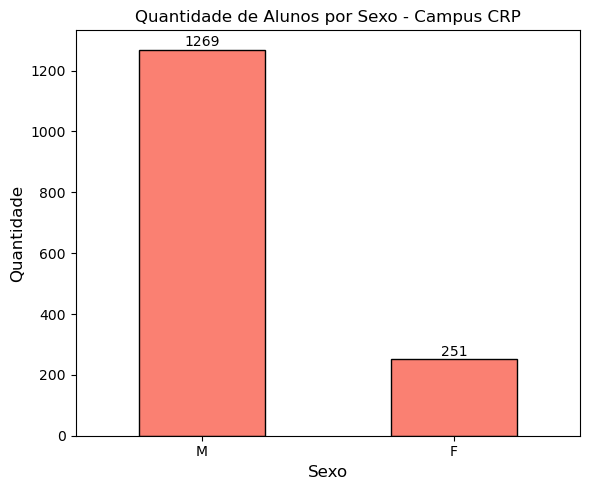

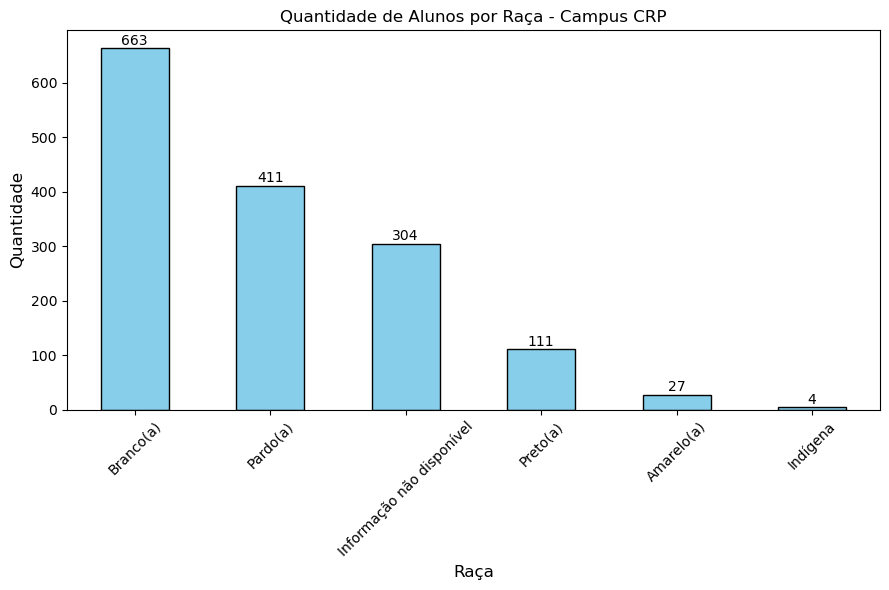

In [11]:
# Obter os campi únicos
campi = dados['Campus'].unique()

# Análise separada por campus
for campus in campi:
    # Filtrar os dados por campus
    dados_campus = dados[dados['Campus'] == campus]
    
    # Contar os valores para Sexo, UF de Nascimento e Raça
    contagem_sexo = dados_campus['Sexo'].value_counts()
    contagem_uf = dados_filtrados_UF[dados_filtrados_UF['Campus'] == campus]['UF_Nascimento'].value_counts()
    contagem_raca = dados_campus['Raca'].value_counts()

    # Exibir as contagens
    print(f"\nContagem de Alunos - Campus {campus}")
    print("Sexo:")
    print(contagem_sexo)
    print("\nUF de Nascimento:")
    print(contagem_uf)
    print("\nRaça:")
    print(contagem_raca)

    # Criar gráfico de barras para Sexo
    plt.figure(figsize=(6, 5))
    ax1 = contagem_sexo.plot(kind='bar', color='salmon', edgecolor='black')
    for p in ax1.patches:
        ax1.text(p.get_x() + p.get_width() / 2, p.get_height() + 1,
                 int(p.get_height()), ha='center', va='bottom', fontsize=10)
    plt.title(f'Quantidade de Alunos por Sexo - Campus {campus}', fontsize=12)
    plt.xlabel('Sexo', fontsize=12)
    plt.ylabel('Quantidade', fontsize=12)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Criar gráfico de barras para Raça
    plt.figure(figsize=(9, 6))
    ax3 = contagem_raca.plot(kind='bar', color='skyblue', edgecolor='black')
    for p in ax3.patches:
        ax3.text(p.get_x() + p.get_width() / 2, p.get_height() + 1,
                 int(p.get_height()), ha='center', va='bottom', fontsize=10)
    plt.title(f'Quantidade de Alunos por Raça - Campus {campus}', fontsize=12)
    plt.xlabel('Raça', fontsize=12)
    plt.ylabel('Quantidade', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Como se distribuem os alunos por região do estado de origem? 

#### Geral

Quantidade de alunos por região de nascimento:
Regiao_Nascimento
Sudeste         3106
Nordeste          58
Centro-Oeste      48
Sul               22
Norte             11
Name: count, dtype: int64


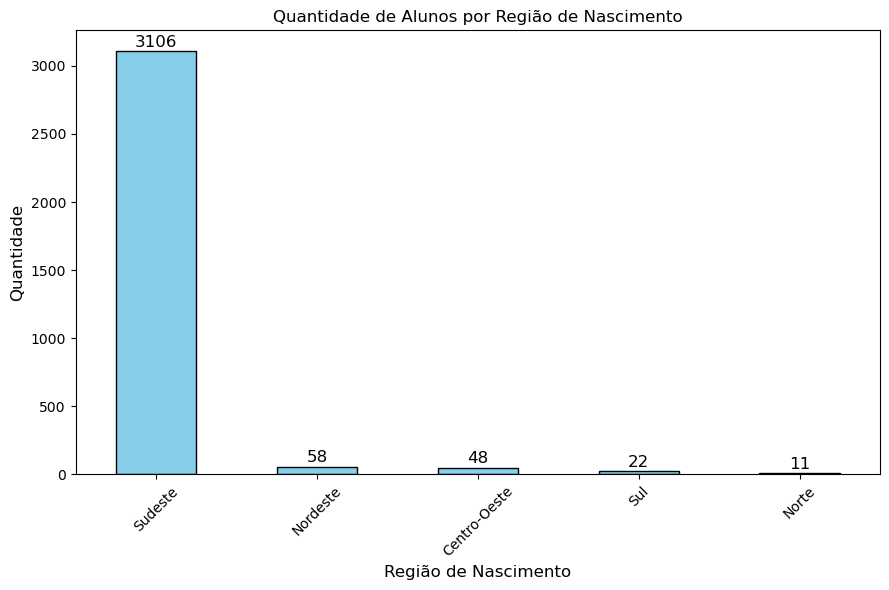

In [12]:
# Contar os valores únicos na coluna Regiao_Nascimento
contagem_regiao = dados['Regiao_Nascimento'].value_counts()

# Exibir a contagem no terminal
print("Quantidade de alunos por região de nascimento:")
print(contagem_regiao)

# Criar o gráfico de barras
plt.figure(figsize=(9, 6))
ax = contagem_regiao.plot(kind='bar', color='skyblue', edgecolor='black')
# Adiciona os valores acima das barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                xytext=(0, 1),  # Ajuste a posição vertical do texto
                textcoords='offset points', ha='center', va='bottom', fontsize=12)
# Títulos e rótulos
plt.title('Quantidade de Alunos por Região de Nascimento', fontsize=12)
plt.xlabel('Região de Nascimento', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xticks(rotation=45)
# Ajusta o layout para evitar sobreposição
plt.tight_layout()
# Exibe o gráfico
plt.show()

#### Por campus


Campus: CAV - Quantidade de alunos por região de nascimento:
Regiao_Nascimento
Sudeste         1037
Nordeste          36
Centro-Oeste      12
Sul               10
Norte              6
Name: count, dtype: int64


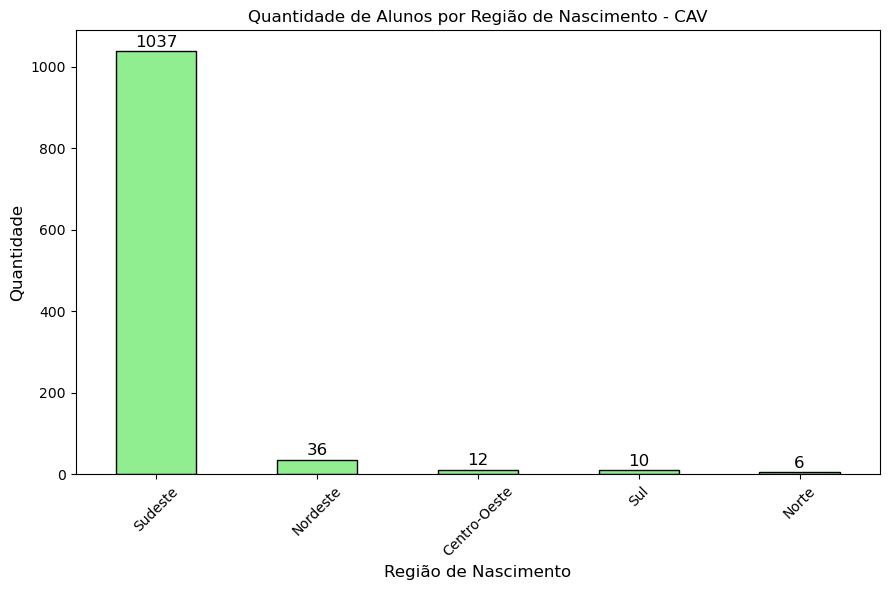


Campus: CAF - Quantidade de alunos por região de nascimento:
Regiao_Nascimento
Sudeste         616
Norte             3
Nordeste          2
Centro-Oeste      2
Sul               1
Name: count, dtype: int64


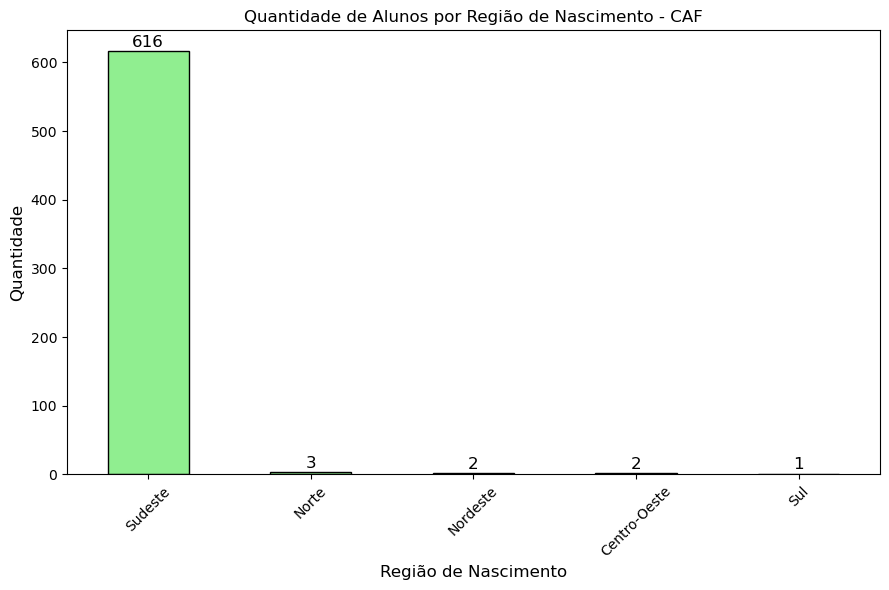


Campus: CRP - Quantidade de alunos por região de nascimento:
Regiao_Nascimento
Sudeste         1453
Centro-Oeste      34
Nordeste          20
Sul               11
Norte              2
Name: count, dtype: int64


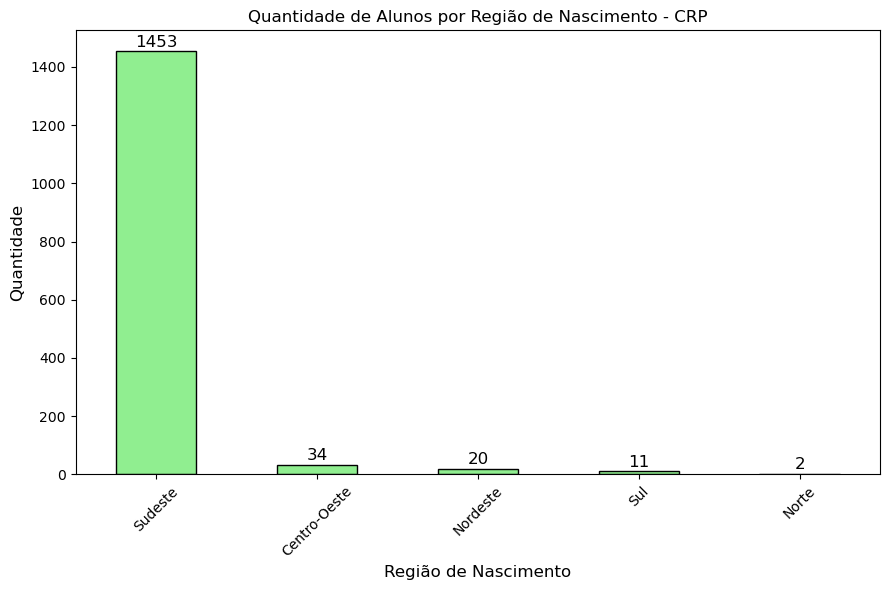

In [13]:
# Obter os campi únicos
campi = dados['Campus'].unique()

# Análise separada por campus
for campus in campi:
    # Filtrar os dados por campus
    dados_campus = dados[dados['Campus'] == campus]
    
    # Contar os valores únicos na coluna Regiao_Nascimento
    contagem_regiao = dados_campus['Regiao_Nascimento'].value_counts()
    
    # Exibir a contagem no terminal
    print(f"\nCampus: {campus} - Quantidade de alunos por região de nascimento:")
    print(contagem_regiao)
    
    # Criar o gráfico de barras
    plt.figure(figsize=(9, 6))
    ax = contagem_regiao.plot(kind='bar', color='lightgreen', edgecolor='black')
    plt.title(f'Quantidade de Alunos por Região de Nascimento - {campus}', fontsize=12)
    plt.xlabel('Região de Nascimento', fontsize=12)
    plt.ylabel('Quantidade', fontsize=12)
    plt.xticks(rotation=45)
    
    # Adicionar os números acima das barras
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    xytext=(0, 1),  # Ajuste a posição vertical do texto
                    textcoords='offset points', ha='center', va='bottom', fontsize=12)
    
    # Ajusta o layout e exibe o gráfico
    plt.tight_layout()
    plt.show()

### 3️⃣ Quais são as características do ingresso dos alunos?

### Qual a distribuição dos alunos por intervalo de ano de nascimento? 

#### Geral

Quantidade de alunos por intervalo de ano de nascimento:
Intervalo_Ano_Nascimento
1950-1959       2
1960-1969      10
1970-1979      56
1980-1989     627
1990-1999    1736
2000-2009     814
Name: count, dtype: int64


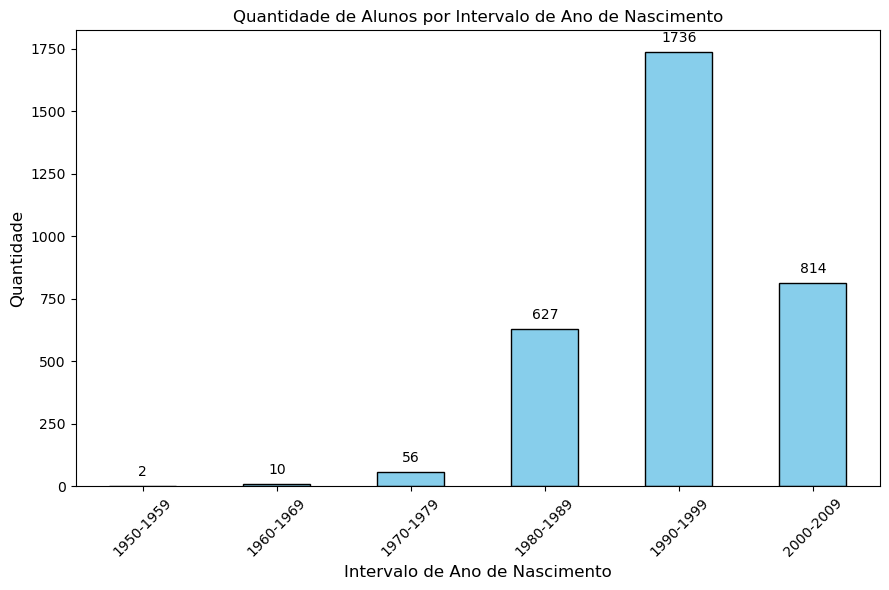

In [14]:
# Contar os valores únicos na coluna Intervalo_Ano_Nascimento
contagem_intervalo_ano = dados['Intervalo_Ano_Nascimento'].value_counts().sort_index()

# Exibir a contagem no terminal
print("Quantidade de alunos por intervalo de ano de nascimento:")
print(contagem_intervalo_ano)

# Criar o gráfico de barras
plt.figure(figsize=(9, 6))
ax = contagem_intervalo_ano.plot(kind='bar', color='skyblue', edgecolor='black')

# Adicionar os números acima das barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Quantidade de Alunos por Intervalo de Ano de Nascimento', fontsize=12)
plt.xlabel('Intervalo de Ano de Nascimento', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Por campus


Campus: CAV - Quantidade de alunos por intervalo de ano de nascimento:
Intervalo_Ano_Nascimento
1950-1959      2
1970-1979     21
1980-1989    424
1990-1999    471
2000-2009    183
Name: count, dtype: int64


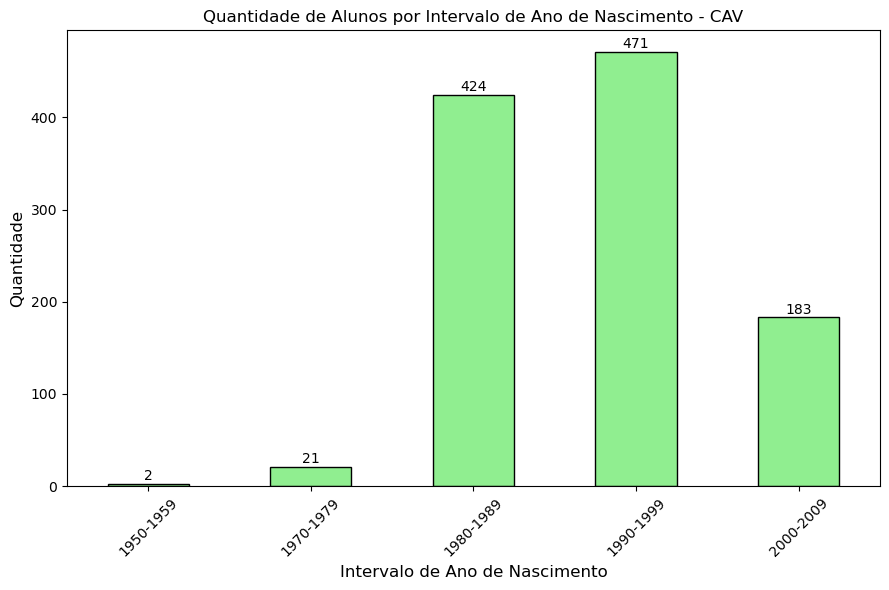


Campus: CAF - Quantidade de alunos por intervalo de ano de nascimento:
Intervalo_Ano_Nascimento
1970-1979      9
1980-1989     36
1990-1999    335
2000-2009    244
Name: count, dtype: int64


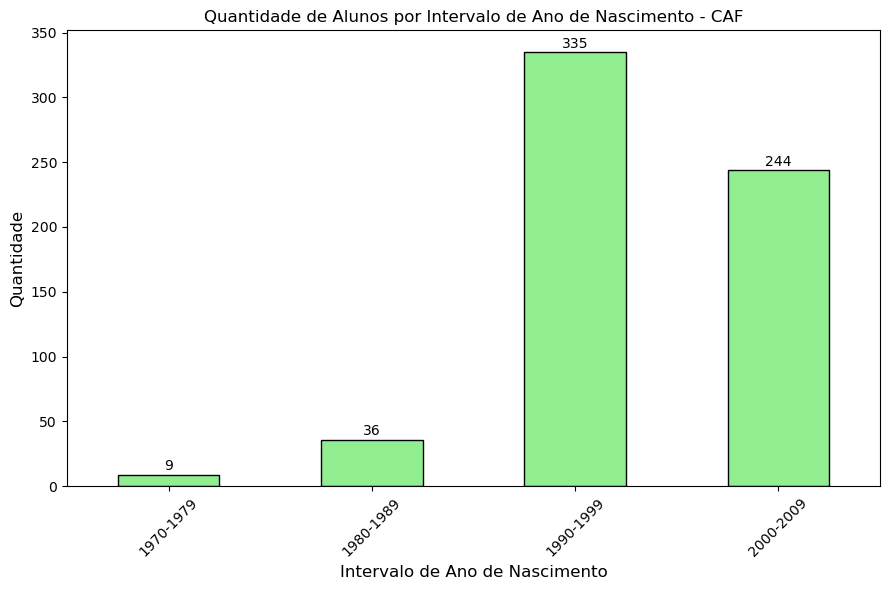


Campus: CRP - Quantidade de alunos por intervalo de ano de nascimento:
Intervalo_Ano_Nascimento
1960-1969     10
1970-1979     26
1980-1989    167
1990-1999    930
2000-2009    387
Name: count, dtype: int64


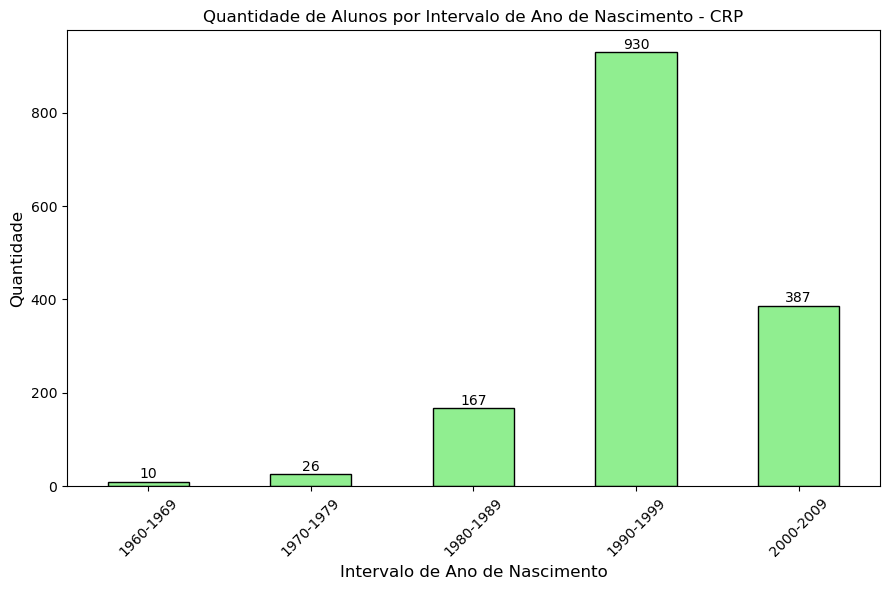

In [15]:
# Obter os campi únicos
campi = dados['Campus'].unique()

# Análise separada por campus
for campus in campi:
    # Filtrar os dados por campus
    dados_campus = dados[dados['Campus'] == campus]
    
    # Contar os valores únicos na coluna Intervalo_Ano_Nascimento
    contagem_intervalo_ano = dados_campus['Intervalo_Ano_Nascimento'].value_counts().sort_index()
    
    # Exibir a contagem no terminal
    print(f"\nCampus: {campus} - Quantidade de alunos por intervalo de ano de nascimento:")
    print(contagem_intervalo_ano)
    
    # Criar o gráfico de barras
    plt.figure(figsize=(9, 6))
    ax = contagem_intervalo_ano.plot(kind='bar', color='lightgreen', edgecolor='black')
    plt.title(f'Quantidade de Alunos por Intervalo de Ano de Nascimento - {campus}', fontsize=12)
    plt.xlabel('Intervalo de Ano de Nascimento', fontsize=12)
    plt.ylabel('Quantidade', fontsize=12)
    plt.xticks(rotation=45)
    
    # Adicionar os números acima das barras
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2, p.get_height() + 1), 
                    ha='center', va='bottom', fontsize=10, color='black')
    
    plt.tight_layout()
    plt.show()

### Como os alunos estão distribuídos pelas modalidades do ENEM? 

#### Geral

Quantidade de alunos por modalidade inscrita:
Modalidade_Inscrita
9.0    1239
0.0     660
5.0     257
1.0     231
7.0     205
3.0     202
8.0       6
4.0       3
6.0       2
2.0       1
Name: count, dtype: int64


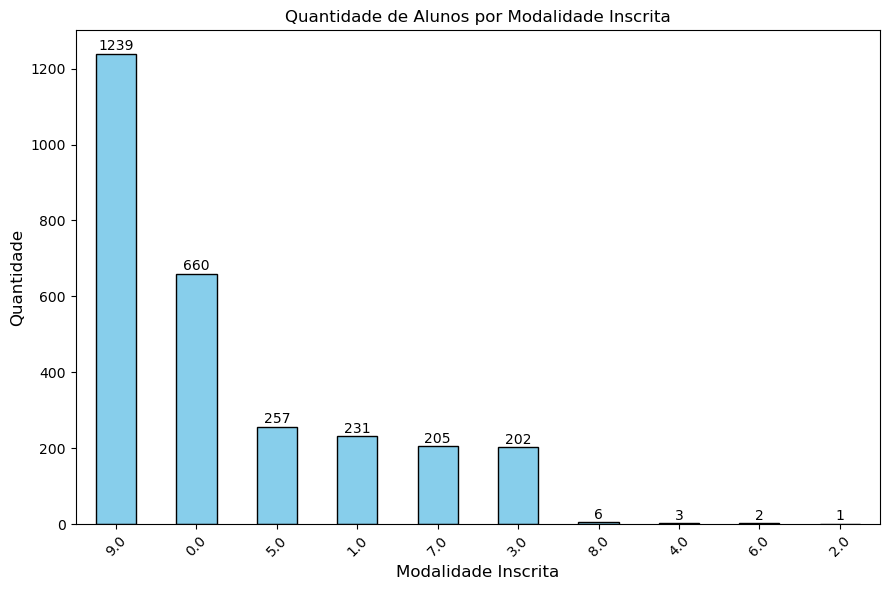

In [16]:
# Contar os valores únicos na coluna Modalidade_Inscrita
contagem_modalidade = dados['Modalidade_Inscrita'].value_counts()

# Exibir a contagem no terminal
print("Quantidade de alunos por modalidade inscrita:")
print(contagem_modalidade)

# Criar o gráfico de barras
plt.figure(figsize=(9, 6))
ax = contagem_modalidade.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Quantidade de Alunos por Modalidade Inscrita', fontsize=12)
plt.xlabel('Modalidade Inscrita', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xticks(rotation=45)

# Adicionar os números acima das barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

#### Por campus


Campus: CAV - Quantidade de alunos por modalidade inscrita:
Modalidade_Inscrita
0.0    598
9.0    266
1.0     71
5.0     67
7.0     44
3.0     39
8.0      3
4.0      3
6.0      1
Name: count, dtype: int64


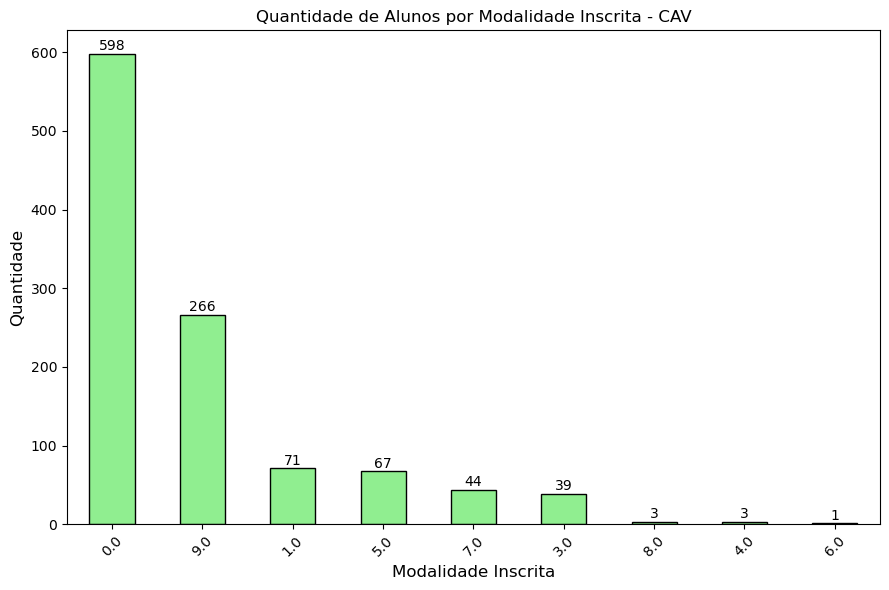


Campus: CAF - Quantidade de alunos por modalidade inscrita:
Modalidade_Inscrita
9.0    306
1.0     70
5.0     69
3.0     59
7.0     54
0.0     14
8.0      1
2.0      1
Name: count, dtype: int64


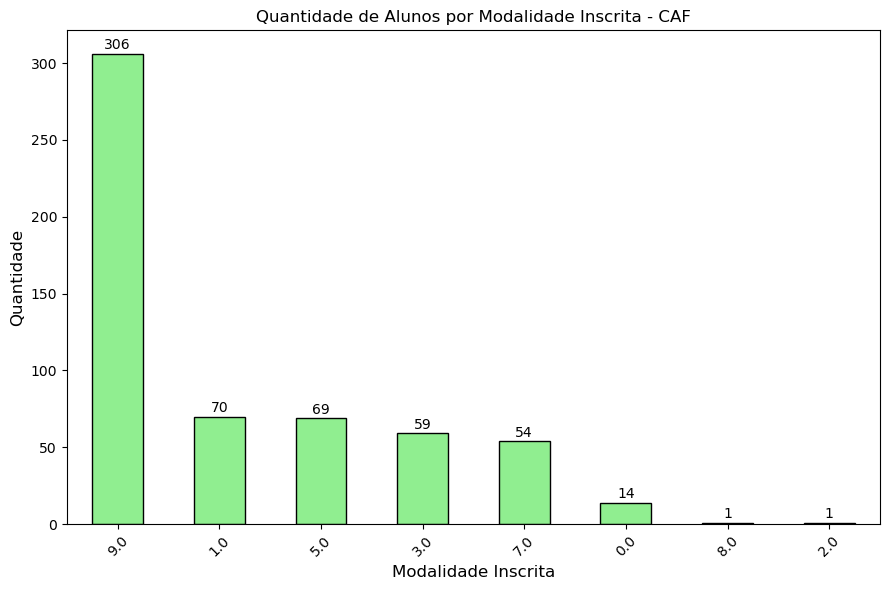


Campus: CRP - Quantidade de alunos por modalidade inscrita:
Modalidade_Inscrita
9.0    667
5.0    121
7.0    107
3.0    104
1.0     90
0.0     48
8.0      2
6.0      1
Name: count, dtype: int64


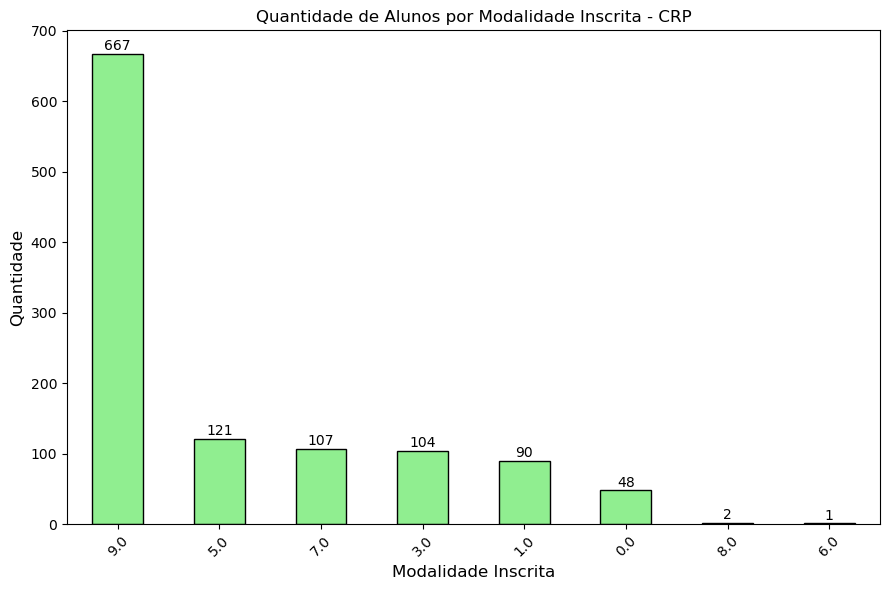

In [17]:
# Obter os campi únicos
campi = dados['Campus'].unique()

# Análise separada por campus
for campus in campi:
    # Filtrar os dados por campus
    dados_campus = dados[dados['Campus'] == campus]
    
    # Contar os valores únicos na coluna Modalidade_Inscrita
    contagem_modalidade = dados_campus['Modalidade_Inscrita'].value_counts()
    
    # Exibir a contagem no terminal
    print(f"\nCampus: {campus} - Quantidade de alunos por modalidade inscrita:")
    print(contagem_modalidade)
    
    # Criar o gráfico de barras
    plt.figure(figsize=(9, 6))
    ax = contagem_modalidade.plot(kind='bar', color='lightgreen', edgecolor='black')
    plt.title(f'Quantidade de Alunos por Modalidade Inscrita - {campus}', fontsize=12)
    plt.xlabel('Modalidade Inscrita', fontsize=12)
    plt.ylabel('Quantidade', fontsize=12)
    plt.xticks(rotation=45)

    # Adicionar os números acima das barras
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                    ha='center', va='bottom', fontsize=10, color='black')

    plt.tight_layout()
    plt.show()

### 4️⃣ Qual a distribuição dos alunos por:

### Situação do aluno

#### Geral

In [18]:
# Contagem de valores únicos na coluna Situacao_Aluno
contagem_situacao = dados['Situacao_Aluno'].value_counts()

# Exibir a contagem no terminal
print("Quantidade de alunos por Situação do Aluno:")
print(contagem_situacao)

Quantidade de alunos por Situação do Aluno:
Situacao_Aluno
Conclusão                                             909
Estudante em abandono do curso                        720
Normal                                                574
Desligamento                                          460
Abandono                                              418
Mudança de Curso                                      126
Trancamento                                            15
Transferência                                           9
Afastamento/Intercâmbio                                 3
Matrícula Condicional/Reconsideração Desligamento       2
Matrícula Condicional/Reconsideração desligamento       1
Afastamento Especial                                    1
Concluiu as exigências do curso (não colou grau)        1
Falecimento                                             1
Concluinte (não colou grau)                             1
Exclusão                                                1
Afastamento/R

#### Por campus

In [19]:
# Obter os campi únicos
campi = dados['Campus'].unique()

# Análise separada por campus
for campus in campi:
    # Filtrar os dados por campus
    dados_campus = dados[dados['Campus'] == campus]
    
    # Contar os valores únicos na coluna Situacao_Aluno
    contagem_situacao = dados_campus['Situacao_Aluno'].value_counts()
    
    # Exibir a contagem no terminal
    print(f"\nCampus: {campus} - Quantidade de alunos por Situação do Aluno:")
    print(contagem_situacao)


Campus: CAV - Quantidade de alunos por Situação do Aluno:
Situacao_Aluno
Conclusão                                             503
Abandono                                              198
Desligamento                                          151
Normal                                                151
Mudança de Curso                                       87
Transferência                                           5
Trancamento                                             3
Concluiu as exigências do curso (não colou grau)        1
Matrícula Condicional/Reconsideração Desligamento       1
Afastamento/Intercâmbio                                 1
Name: count, dtype: int64

Campus: CAF - Quantidade de alunos por Situação do Aluno:
Situacao_Aluno
Abandono                                              220
Normal                                                171
Conclusão                                             131
Desligamento                                           94
Mudança de Cur

### Situação do aluno agrupada 

#### Geral

In [20]:
# Contagem Geral
contagem_geral = dados['Situacao_Aluno_Agrupada'].value_counts()
print("Contagem Geral de Alunos por Situação Agrupada:")
print(contagem_geral)

Contagem Geral de Alunos por Situação Agrupada:
Situacao_Aluno_Agrupada
Evasão         1735
Conclusão       911
Matriculado     418
Retenção        181
Name: count, dtype: int64


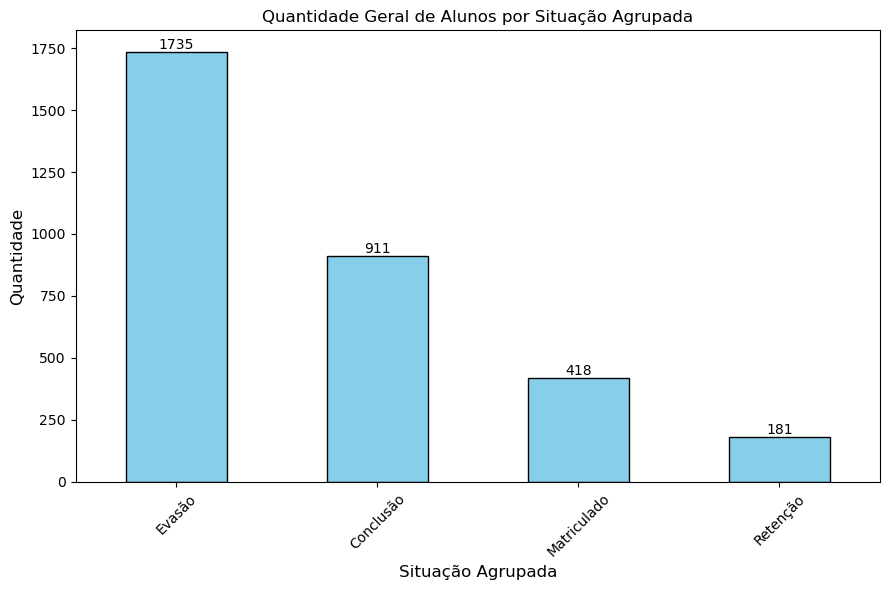

In [21]:
# Contagem geral dos valores na coluna Situacao_Aluno_Agrupada
contagem_geral = dados['Situacao_Aluno_Agrupada'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(9, 6))
ax = contagem_geral.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Quantidade Geral de Alunos por Situação Agrupada', fontsize=12)
plt.xlabel('Situação Agrupada', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xticks(rotation=45)

# Adicionar os números acima das barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height() + 1), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

#### Por campus

In [22]:
# Contagens por campus
campi = dados['Campus'].unique()

for campus in campi:
    # Filtrar os dados por campus
    dados_campus = dados[dados['Campus'] == campus]
    
    # Contar os valores únicos na coluna Situacao_Aluno_Agrupada
    contagem_campus = dados_campus['Situacao_Aluno_Agrupada'].value_counts()
    
    # Exibir a contagem
    print(f"\nContagem de Alunos por Situação Agrupada - Campus {campus}:")
    print(contagem_campus)


Contagem de Alunos por Situação Agrupada - Campus CAV:
Situacao_Aluno_Agrupada
Conclusão      504
Evasão         441
Matriculado     98
Retenção        58
Name: count, dtype: int64

Contagem de Alunos por Situação Agrupada - Campus CAF:
Situacao_Aluno_Agrupada
Evasão         317
Conclusão      131
Matriculado    120
Retenção        56
Name: count, dtype: int64

Contagem de Alunos por Situação Agrupada - Campus CRP:
Situacao_Aluno_Agrupada
Evasão         977
Conclusão      276
Matriculado    200
Retenção        67
Name: count, dtype: int64


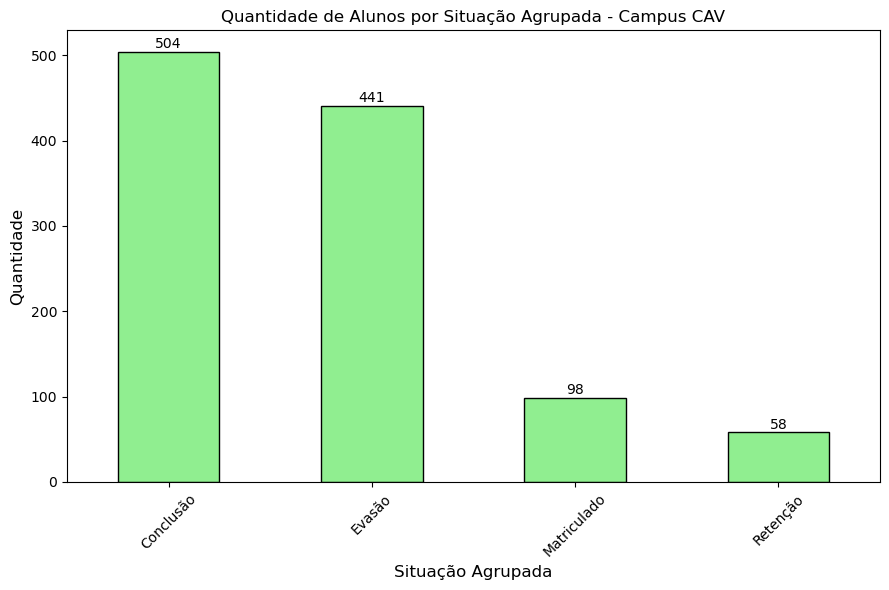

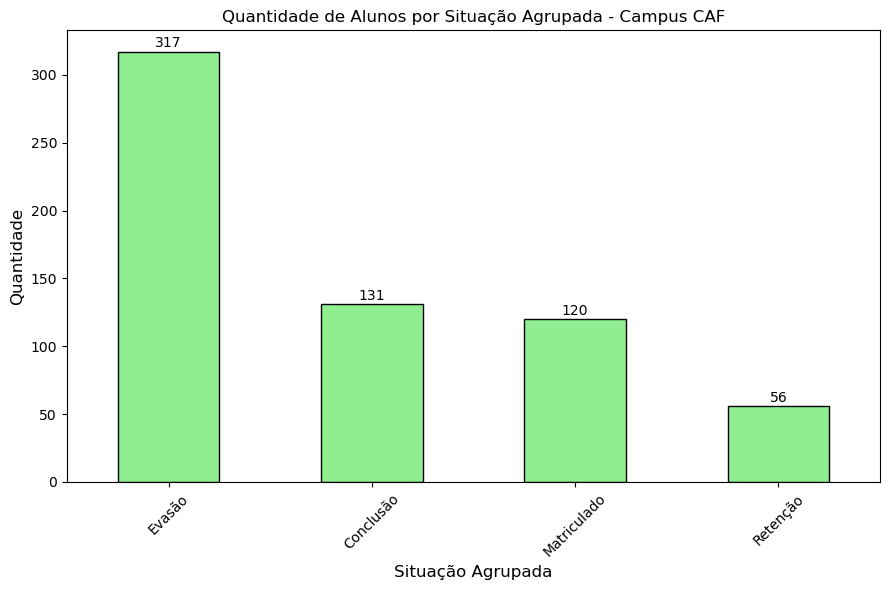

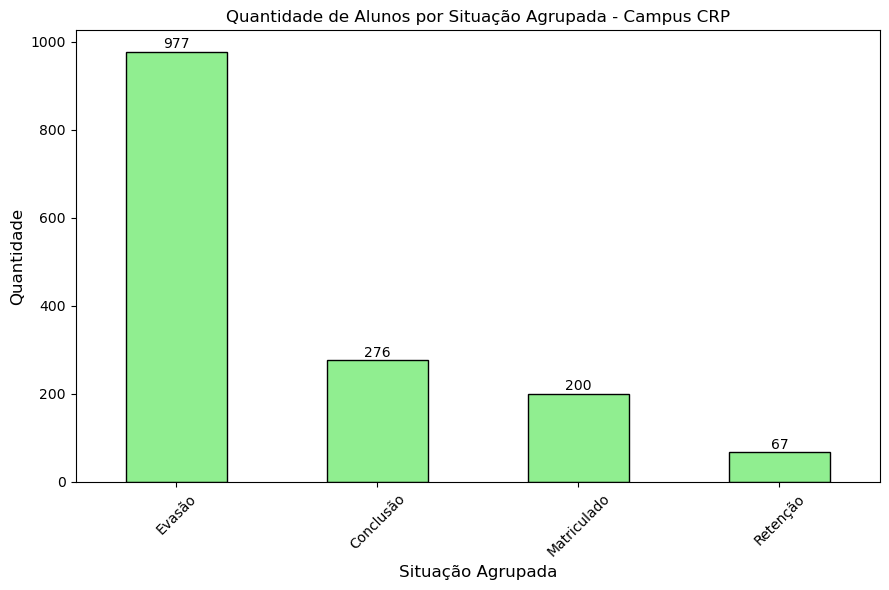

In [23]:
# Gráficos separados por campus
campi = dados['Campus'].unique()

for campus in campi:
    # Filtrar os dados por campus
    dados_campus = dados[dados['Campus'] == campus]
    
    # Contar os valores únicos na coluna Situacao_Aluno_Agrupada
    contagem_campus = dados_campus['Situacao_Aluno_Agrupada'].value_counts()
    
    # Criar o gráfico de barras
    plt.figure(figsize=(9, 6))
    ax = contagem_campus.plot(kind='bar', color='lightgreen', edgecolor='black')
    plt.title(f'Quantidade de Alunos por Situação Agrupada - Campus {campus}', fontsize=12)
    plt.xlabel('Situação Agrupada', fontsize=12)
    plt.ylabel('Quantidade', fontsize=12)
    plt.xticks(rotation=45)
    
    # Adicionar os números acima das barras
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2, p.get_height() + 1), 
                    ha='center', va='bottom', fontsize=10, color='black')
    
    plt.tight_layout()
    plt.show()

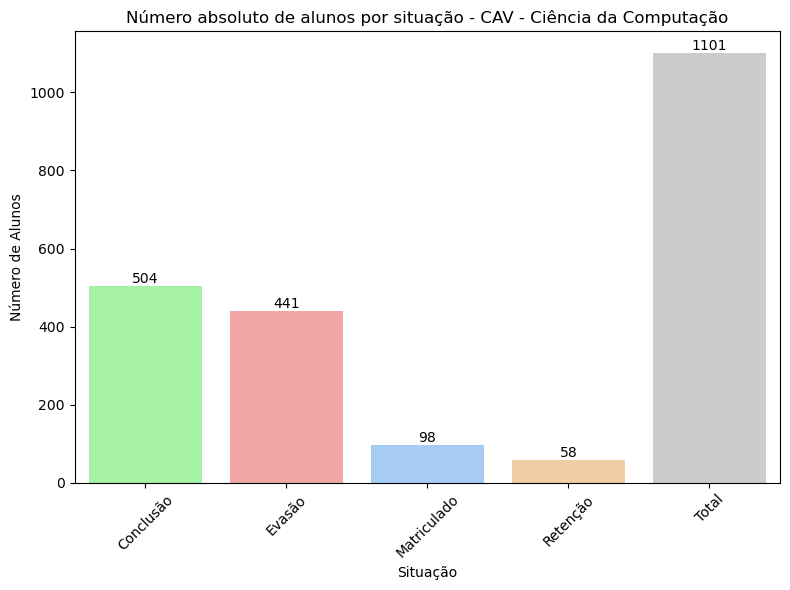

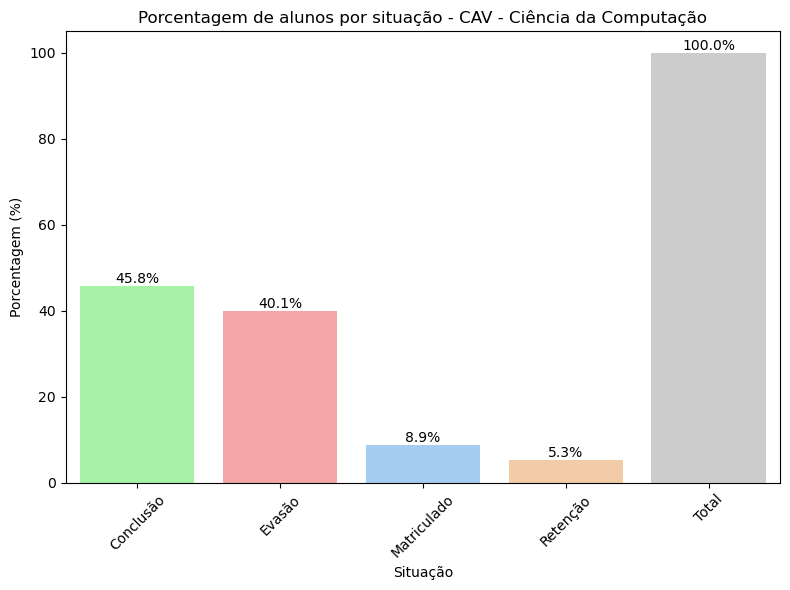

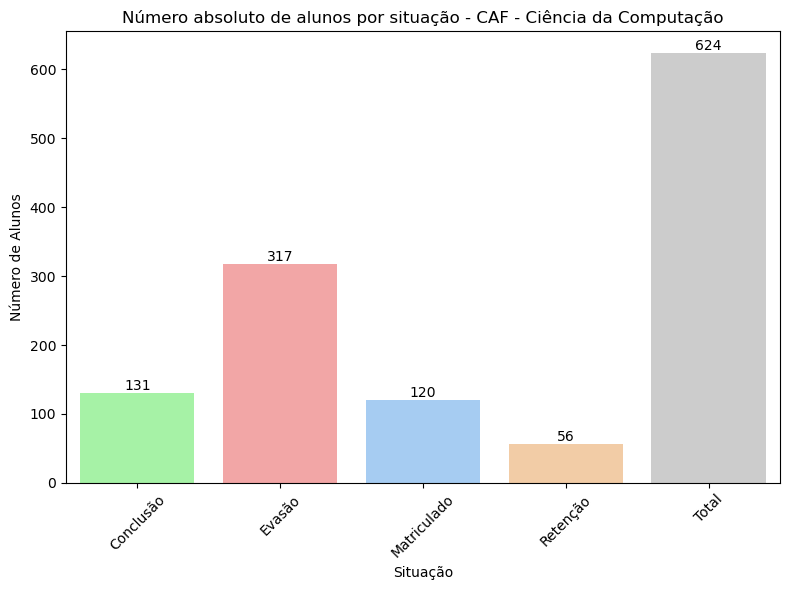

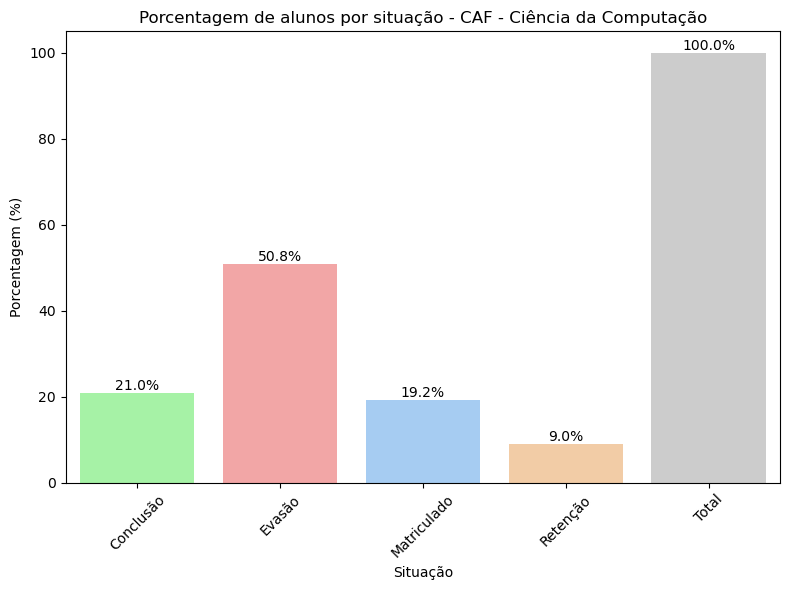

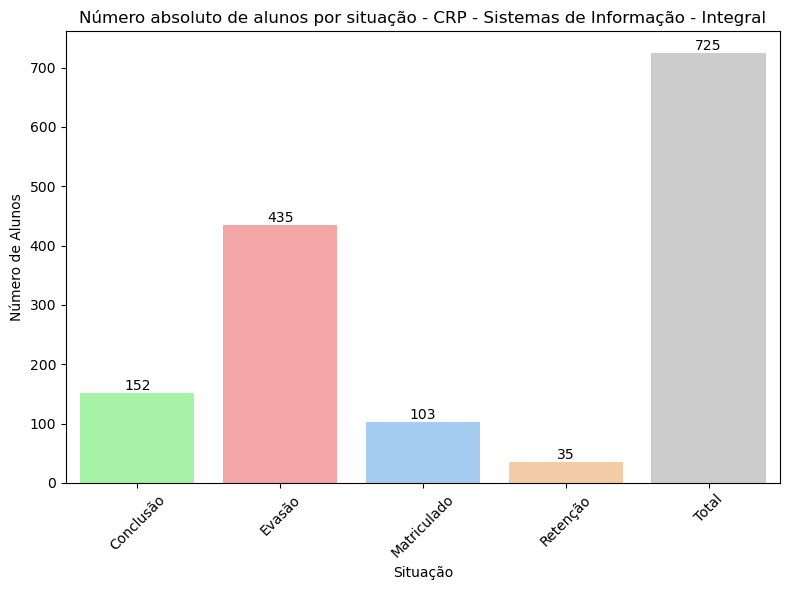

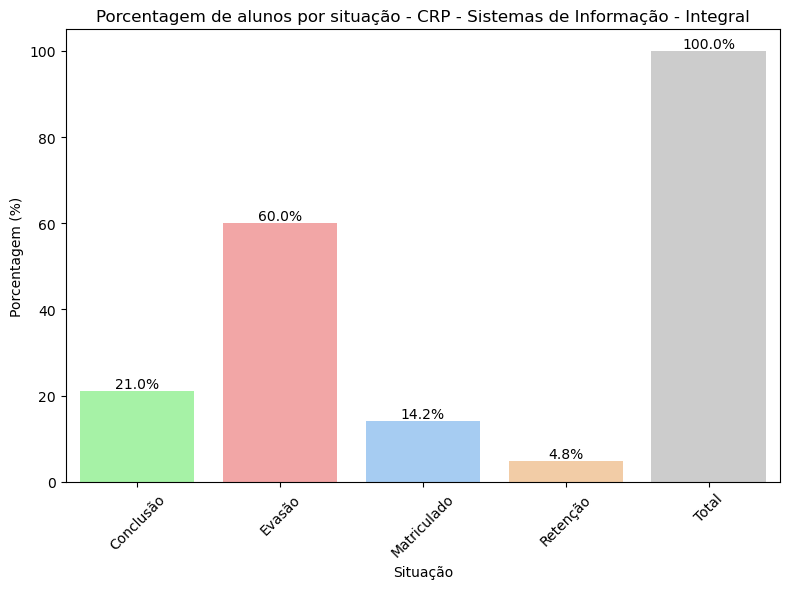

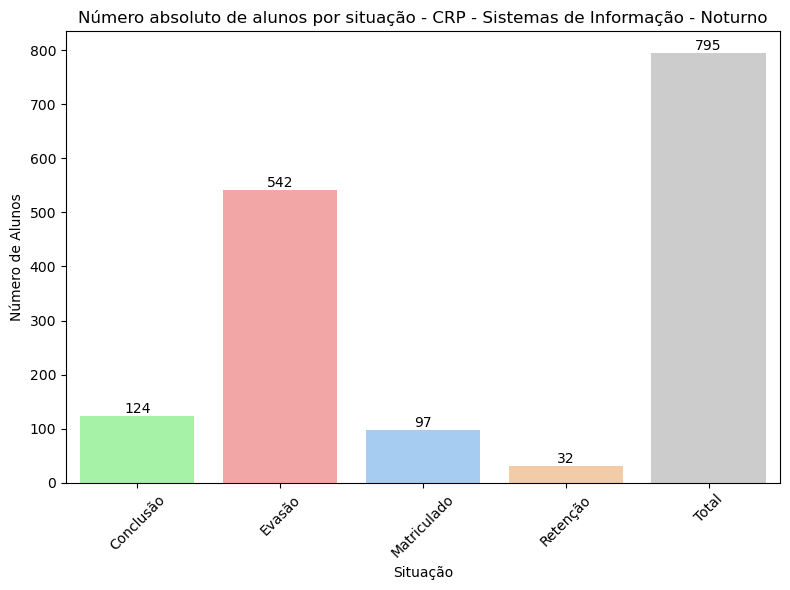

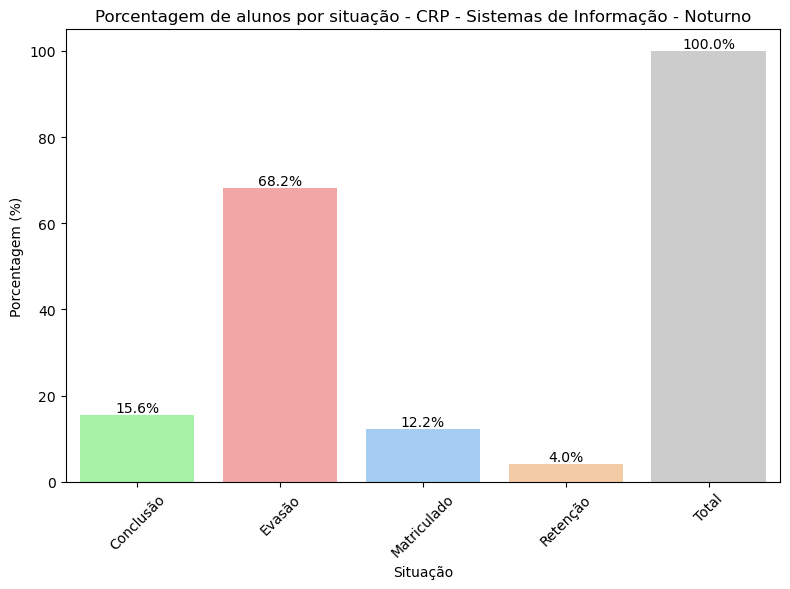

In [24]:
# Lista de situações e suas cores correspondentes
situacoes = ['Conclusão', 'Evasão', 'Retenção', 'Matriculado']
cores = {
    'Evasão': '#ff9999',       # Vermelho pastel
    'Conclusão': '#99ff99',    # Verde pastel
    'Retenção': '#ffcc99',     # Laranja pastel
    'Matriculado': '#99ccff',  # Azul pastel
    'Total': '#cccccc'         # Cinza pastel (total de alunos)
}

# Filtrar os cursos únicos
cursos_unicos = dados['Curso'].unique()

# Para cada curso, gerar um gráfico separado
for curso in cursos_unicos:
    # Ignorar o curso "CAF - Tecnologia em Análise e Desenvolvimento de Sistemas"
    if curso == 'CAF - Tecnologia em Análise e Desenvolvimento de Sistemas':
        continue
    
    # Filtrar os dados do curso atual
    dados_curso = dados[dados['Curso'] == curso]
    
    # Contar o número de alunos por situação
    contagem_situacao = dados_curso.groupby('Situacao_Aluno_Agrupada').size()
    
    # Adicionar o total de alunos
    total_alunos = contagem_situacao.sum()
    contagem_situacao['Total'] = total_alunos

    # Porcentagem de cada situação em relação ao total de alunos
    porcentagem_situacao = (contagem_situacao / total_alunos) * 100
    
    # Gráfico 1: Número absoluto de alunos por situação e total
    plt.figure(figsize=(8, 6))
    sns.barplot(x=contagem_situacao.index, 
                y=contagem_situacao.values, 
                palette=[cores.get(situacao, '#cccccc') for situacao in contagem_situacao.index])
    plt.title(f'Número absoluto de alunos por situação - {curso}')
    plt.xlabel('Situação')
    plt.ylabel('Número de Alunos')
    plt.xticks(rotation=45)
    for i in range(len(contagem_situacao)):
        plt.text(i, contagem_situacao.values[i], int(contagem_situacao.values[i]), 
                 ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

    # Gráfico 2: Porcentagem de alunos por situação em relação ao total
    plt.figure(figsize=(8, 6))
    sns.barplot(x=porcentagem_situacao.index, 
                y=porcentagem_situacao.values, 
                palette=[cores.get(situacao, '#cccccc') for situacao in porcentagem_situacao.index])
    plt.title(f'Porcentagem de alunos por situação - {curso}')
    plt.xlabel('Situação')
    plt.ylabel('Porcentagem (%)')
    plt.xticks(rotation=45)
    for i in range(len(porcentagem_situacao)):
        plt.text(i, porcentagem_situacao.values[i], f'{porcentagem_situacao.values[i]:.1f}%', 
                 ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

### 5️⃣ Qual a quantidade de alunos evadidos por ano?


#### Geral - separado por ano

Quantidade de evasões por ano:
Ano_Admissao
2000     16
2001     10
2002     11
2003     10
2004     14
2005     11
2006     13
2007     14
2008     40
2009     39
2010    100
2011     80
2012    138
2013    156
2014    148
2015    129
2016    157
2017    140
2018    111
2019    123
2020     72
2021     94
2022     63
2023     46
Name: count, dtype: int64


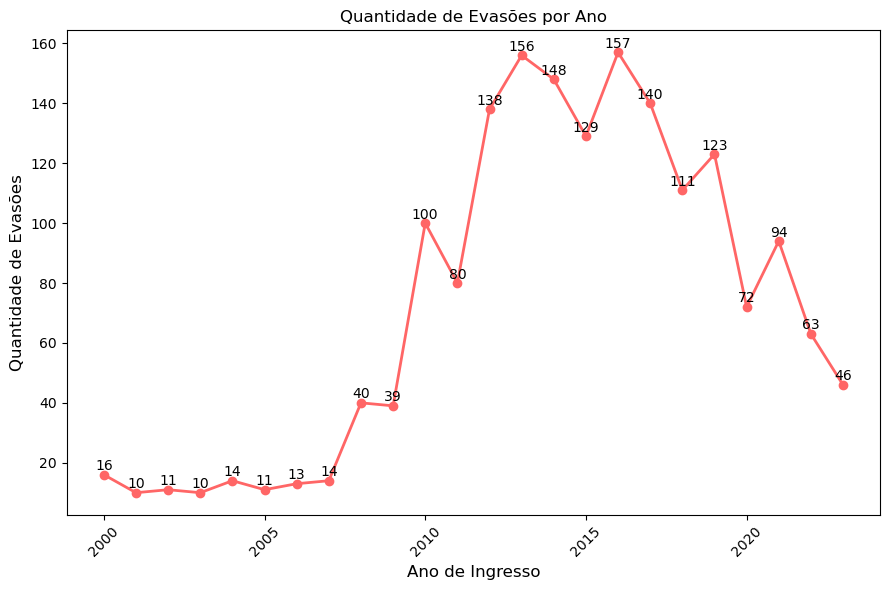

In [25]:
# Filtrar os dados para obter apenas os alunos com situação 'Evasão'
dados_evasao = dados[dados['Situacao_Aluno_Agrupada'] == 'Evasão']

# Contar a quantidade de evasões por período de admissão
contagem_evasao_por_periodo = dados_evasao['Ano_Admissao'].value_counts().sort_index()

# Exibir a contagem no terminal
print("Quantidade de evasões por ano:")
print(contagem_evasao_por_periodo)

# Criar o gráfico de linhas
plt.figure(figsize=(9, 6))
ax = contagem_evasao_por_periodo.plot(kind='line', marker='o', color='#ff6666', linewidth=2)

plt.title('Quantidade de Evasões por Ano', fontsize=12)
plt.xlabel('Ano de Ingresso', fontsize=12)
plt.ylabel('Quantidade de Evasões', fontsize=12)
plt.xticks(rotation=45)

# Adicionar os números acima dos pontos
for x, y in zip(contagem_evasao_por_periodo.index, contagem_evasao_por_periodo.values):
    plt.text(x, y + 0.5, str(y), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Quantidade de evasões por ano:
Ano_Admissao
2000     16
2001     10
2002     11
2003     10
2004     14
2005     11
2006     13
2007     14
2008     40
2009     39
2010    100
2011     80
2012    138
2013    156
2014    148
2015    129
2016    157
2017    140
2018    111
2019    123
2020     72
2021     94
2022     63
2023     46
Name: count, dtype: int64


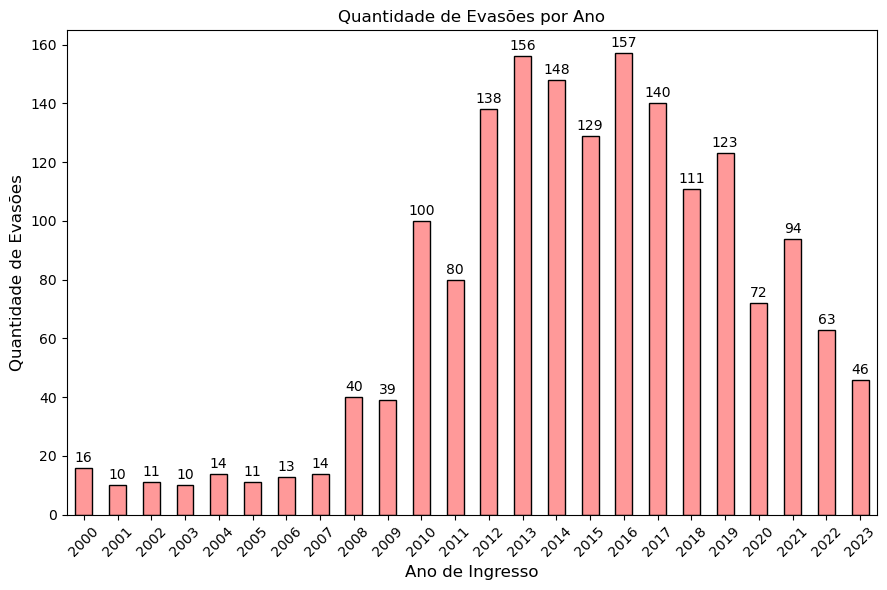

In [26]:
# Filtrar os dados para obter apenas os alunos com situação 'Evasão'
dados_evasao = dados[dados['Situacao_Aluno_Agrupada'] == 'Evasão']

# Contar a quantidade de evasões por período de admissão
contagem_evasao_por_periodo = dados_evasao['Ano_Admissao'].value_counts().sort_index()

# Exibir a contagem no terminal
print("Quantidade de evasões por ano:")
print(contagem_evasao_por_periodo)

# Criar o gráfico de barras
plt.figure(figsize=(9, 6))
ax = contagem_evasao_por_periodo.plot(kind='bar', color='#ff9999', edgecolor='black')
plt.title('Quantidade de Evasões por Ano', fontsize=12)
plt.xlabel('Ano de Ingresso', fontsize=12)
plt.ylabel('Quantidade de Evasões', fontsize=12)
plt.xticks(rotation=45)

# Adicionar os números acima das barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height() + 1), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

#### Por campus - separado por ano

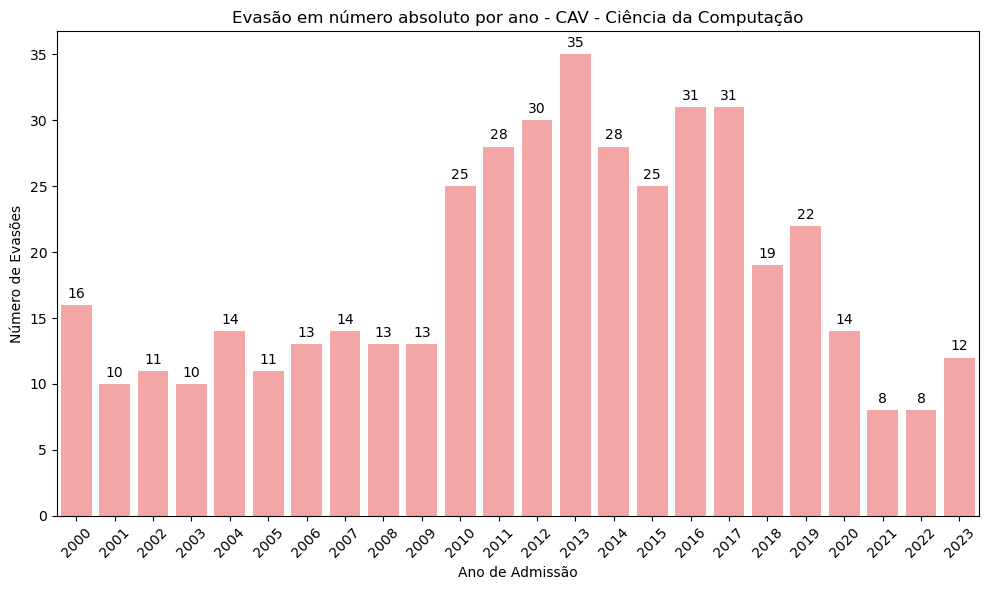

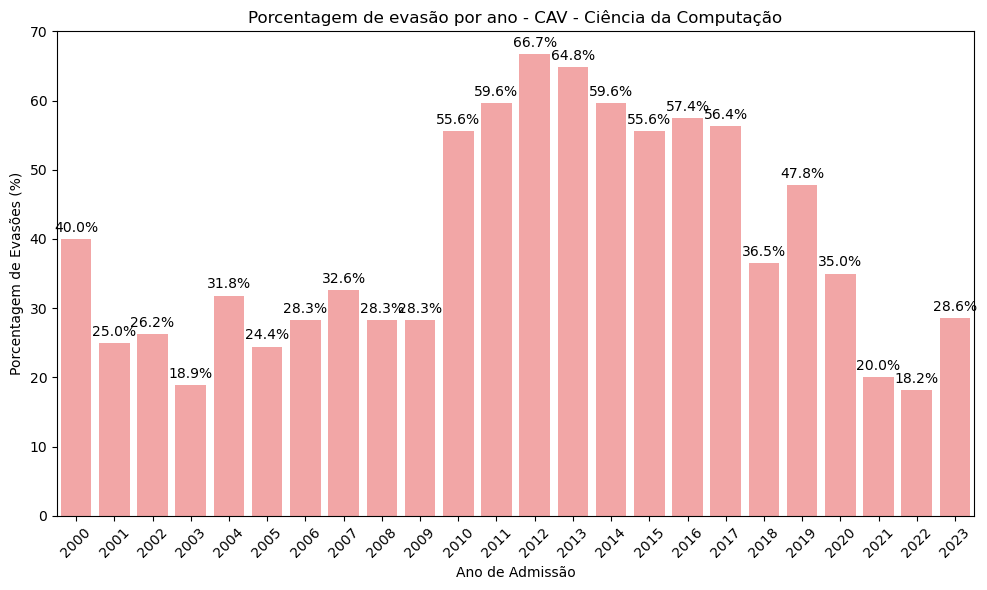

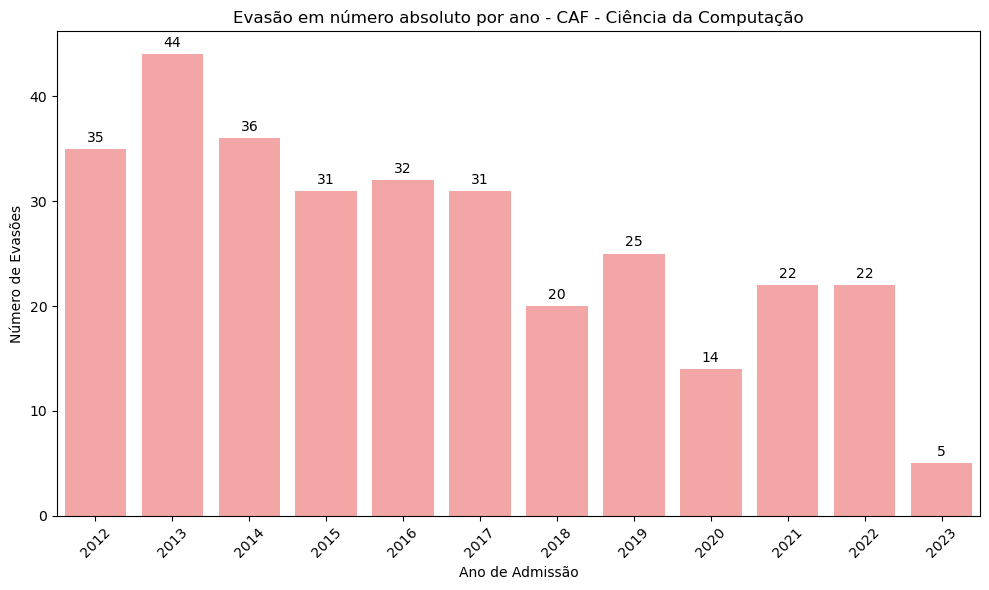

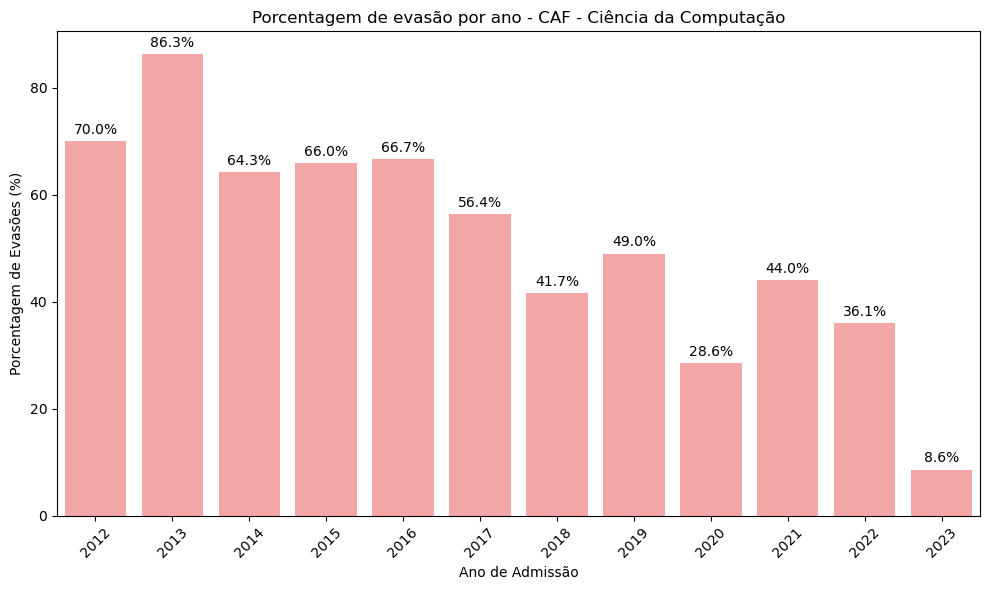

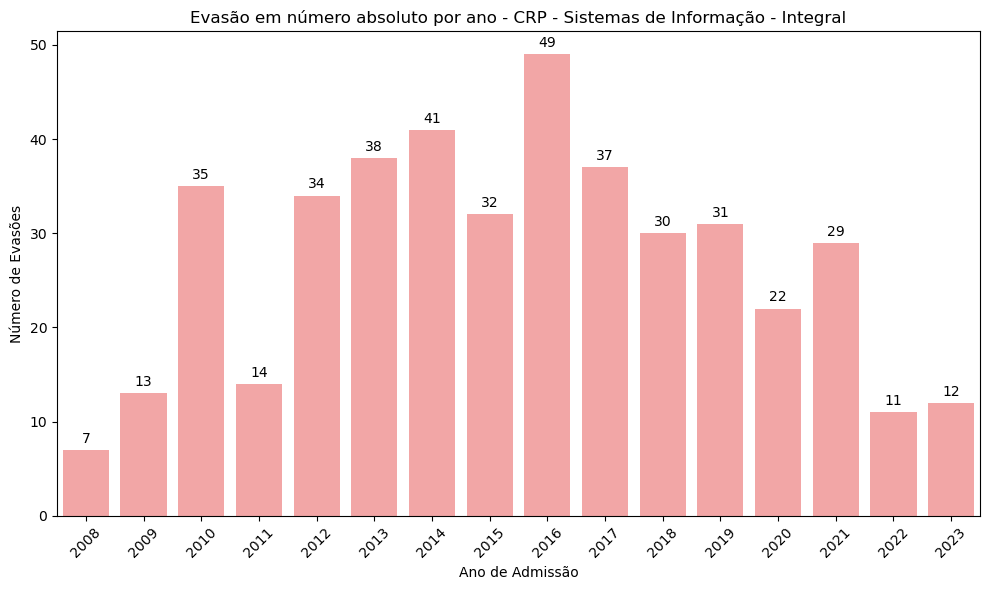

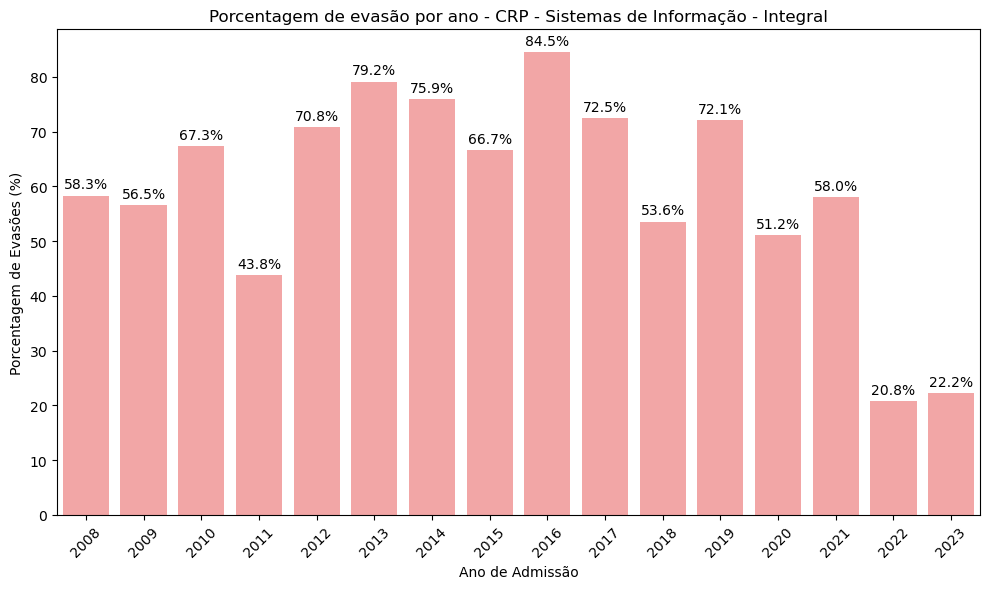

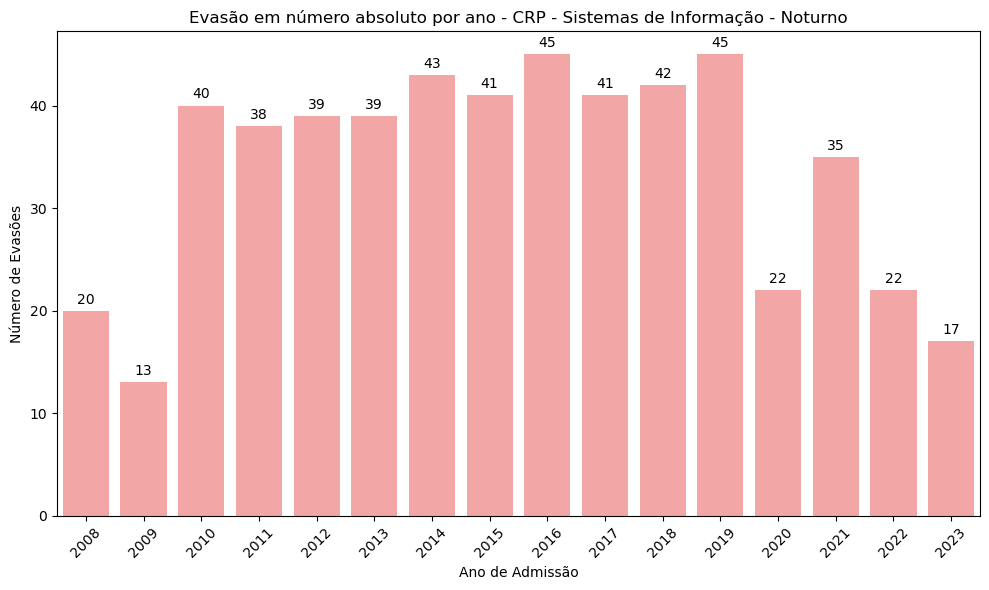

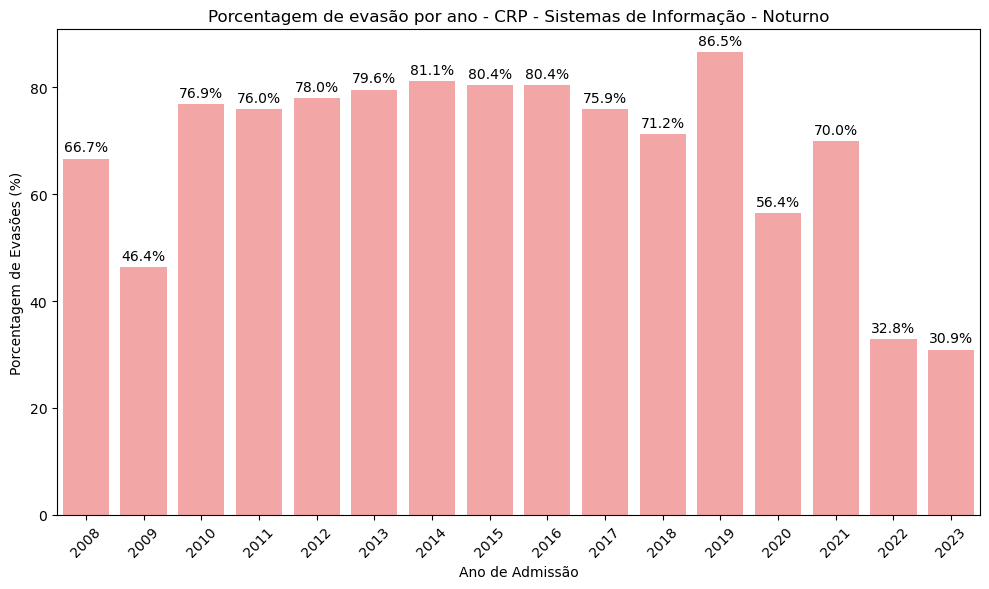

In [27]:
# Filtrar os cursos e anos de admissão
cursos_unicos = dados['Curso'].unique()

# Lista de situações consideradas como evasão
situacoes_evasao = ['Evasão']

# Gráficos para cada curso
for curso in cursos_unicos:
    # Ignorar o curso "CAF - Tecnologia em Análise e Desenvolvimento de Sistemas"
    if curso == 'CAF - Tecnologia em Análise e Desenvolvimento de Sistemas':
        continue
    
    # Filtrar dados do curso
    dados_curso = dados[dados['Curso'] == curso]

    # Contagem de alunos por situação e por ano de admissão
    contagem = dados_curso.groupby(['Ano_Admissao', 'Situacao_Aluno_Agrupada']).size().unstack(fill_value=0)
    
    # Total de alunos por ano de admissão
    total_alunos = contagem.sum(axis=1)
    
    # Contagem de evasão (número absoluto)
    contagem_evasao = contagem[situacoes_evasao].sum(axis=1)

    # Porcentagem de evasão
    porcentagem_evasao = (contagem_evasao / total_alunos) * 100

    # Gráfico 1: Número absoluto de evasão por ano
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=contagem_evasao.index, y=contagem_evasao.values, color='#ff9999')
    plt.title(f'Evasão em número absoluto por ano - {curso}')
    plt.xlabel('Ano de Admissão')
    plt.ylabel('Número de Evasões')
    plt.xticks(rotation=45)
    
    # Adicionar os valores em cima das barras (número absoluto)
    ax.bar_label(ax.containers[0], fmt='%d', padding=3)  # Formato como inteiro
    
    plt.tight_layout()
    plt.show()

    # Gráfico 2: Porcentagem de evasão por ano
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=porcentagem_evasao.index, y=porcentagem_evasao.values, color='#ff9999')
    plt.title(f'Porcentagem de evasão por ano - {curso}')
    plt.xlabel('Ano de Admissão')
    plt.ylabel('Porcentagem de Evasões (%)')
    plt.xticks(rotation=45)
    
    # Adicionar os valores em cima das barras (porcentagem com símbolo %)
    ax.bar_label(ax.containers[0], fmt='%.1f%%', padding=3)  # Inclui o símbolo de porcentagem
    
    plt.tight_layout()
    plt.show()

### 6️⃣ Qual a distribuição da Nota do Enem por ano de admissão? (usar as colunas: Ano_Admissao e Intervalo_Enem) 

#### Geral

In [28]:
# Contagem de alunos por ano de admissão e intervalo de notas do ENEM
# Agrupar os dados pela coluna 'Ano_Admissao' e 'Intervalo_Enem'
contagem_enem_por_ano = dados.groupby(['Ano_Admissao', 'Intervalo_ENEM']).size().unstack(fill_value=0)

# Exibir a contagem no terminal
print("Distribuição da Nota do Enem por Ano de Admissão:")
print(contagem_enem_por_ano)

Distribuição da Nota do Enem por Ano de Admissão:
Intervalo_ENEM  300.0-400.0  400.0-500.0  500.0-600.0  600.0-700.0  \
Ano_Admissao                                                         
2010                      0            5           15            7   
2011                      0            3           18           20   
2012                      2            5           61           97   
2013                      0            1           65           99   
2014                      0           11           89           74   
2015                      1           21           51           92   
2016                      1           14           67          109   
2017                      0           10           63          111   
2018                      0            9           58          117   
2019                      0            5           60           79   
2020                      0            9           39           90   
2021                      0            4

#### Por campus

In [29]:
# Contagem de alunos por ano de admissão, intervalo de notas do ENEM, e campus
for campus in campi:
    # Filtrar os dados para o campus atual
    dados_campus = dados[dados['Campus'] == campus]
    
    # Agrupar os dados pela coluna 'Ano_Admissao', 'Intervalo_ENEM' e contar os alunos
    contagem_enem_por_ano = dados_campus.groupby(['Ano_Admissao', 'Intervalo_ENEM']).size().unstack(fill_value=0)
    
    # Exibir a contagem no terminal
    print(f"\nDistribuição da Nota do Enem por Ano de Admissão - Campus {campus}:")
    print(contagem_enem_por_ano)


Distribuição da Nota do Enem por Ano de Admissão - Campus CAV:
Intervalo_ENEM  500.0-600.0  600.0-700.0  700.0-800.0  800.0-900.0
Ano_Admissao                                                      
2011                      0            5            2            1
2012                      0           28            4            0
2013                      4           34            8            0
2014                      0           22           17            0
2015                      0           25           13            0
2016                      0           33           19            0
2017                      0           30           22            0
2018                      3           25           19            0
2019                      7            9           30            0
2020                      2           13           25            0
2021                      3           10           27            0
2022                      0           20           24            

### 7️⃣ Qual intervalo de nota do ENEM obteve maior taxa de evasão? 

#### Geral

In [30]:
# Filtrar os dados para manter apenas os alunos com evasão
dados_evasao = dados[dados['Situacao_Aluno_Agrupada'] == 'Evasão']

# Contar o número de evasões por intervalo de nota do ENEM
evasao_por_intervalo = dados_evasao.groupby('Intervalo_ENEM').size()

# Contar o número total de alunos por intervalo de nota do ENEM (todos os alunos, não apenas evasões)
total_por_intervalo = dados.groupby('Intervalo_ENEM').size()

# Calcular a taxa de evasão para cada intervalo (evasões / total de alunos)
taxa_evasao = evasao_por_intervalo / total_por_intervalo

# Exibir a taxa de evasão por intervalo
print("Taxa de Evasão por Intervalo de Nota do ENEM:")
print(taxa_evasao)

# Identificar o intervalo com maior taxa de evasão
intervalo_maior_evasao = taxa_evasao.idxmax()
maior_taxa_evasao = taxa_evasao.max()

print(f"\nO intervalo com a maior taxa de evasão é: {intervalo_maior_evasao} com uma taxa de {maior_taxa_evasao:.2f}")

Taxa de Evasão por Intervalo de Nota do ENEM:
Intervalo_ENEM
300.0-400.0    1.000000
400.0-500.0    0.903509
500.0-600.0    0.673525
600.0-700.0    0.524853
700.0-800.0    0.366762
800.0-900.0         NaN
dtype: float64

O intervalo com a maior taxa de evasão é: 300.0-400.0 com uma taxa de 1.00


posx and posy should be finite values
posx and posy should be finite values


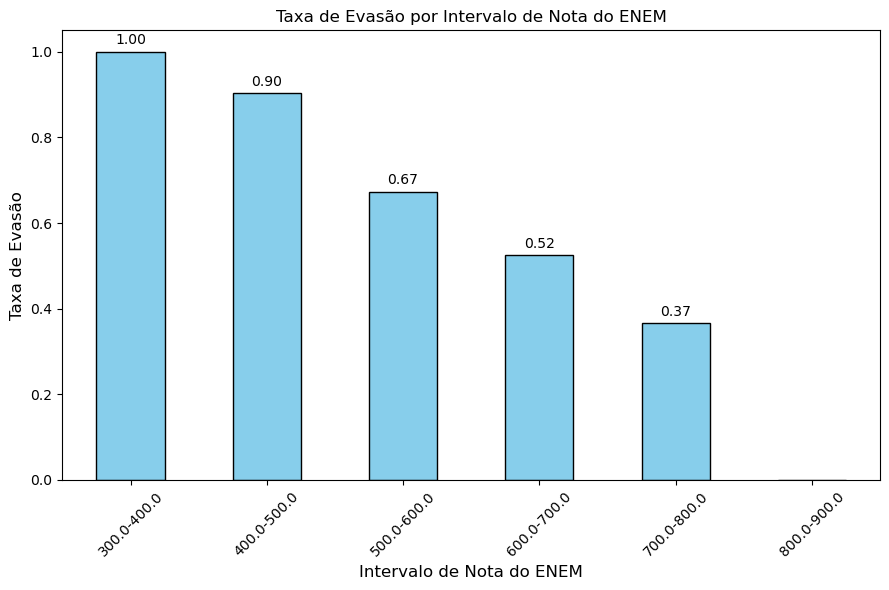

In [31]:
# Criar o gráfico de barras para a taxa de evasão por intervalo de nota do ENEM
plt.figure(figsize=(9, 6))
taxa_evasao.plot(kind='bar', color='skyblue', edgecolor='black')

# Adicionar título e rótulos aos eixos
plt.title('Taxa de Evasão por Intervalo de Nota do ENEM', fontsize=12)
plt.xlabel('Intervalo de Nota do ENEM', fontsize=12)
plt.ylabel('Taxa de Evasão', fontsize=12)

# Adicionar os números acima das barras
for i, v in enumerate(taxa_evasao):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=10)

# Melhorar o layout
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()

#### Por campus

posx and posy should be finite values
posx and posy should be finite values


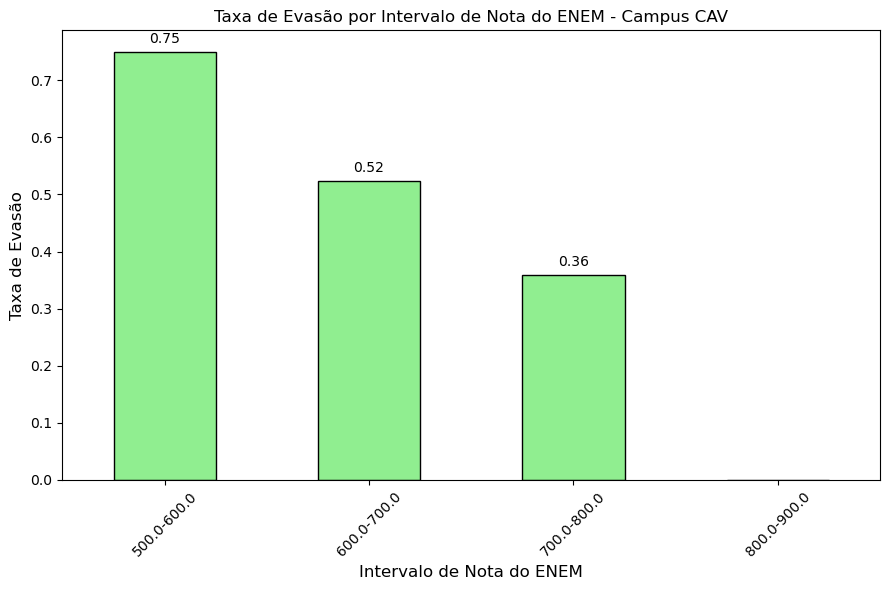

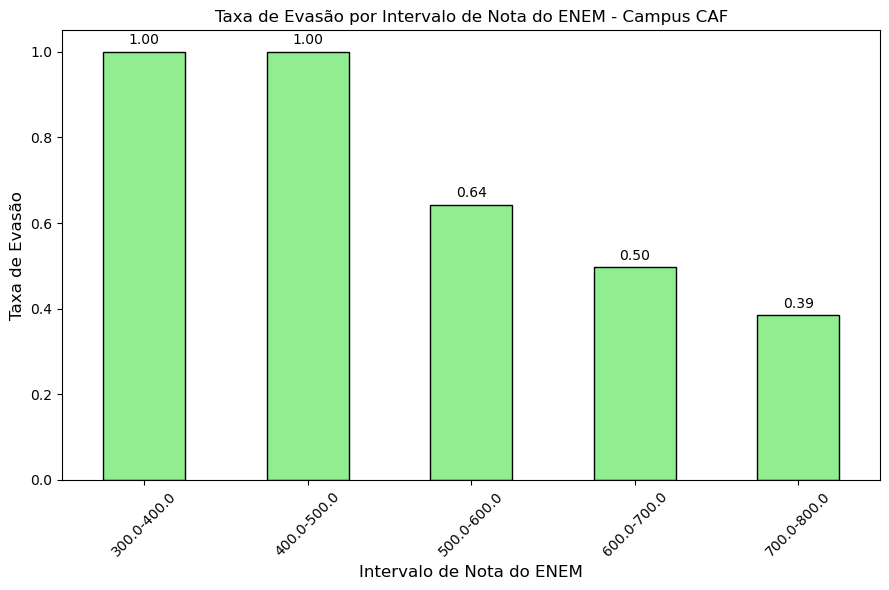

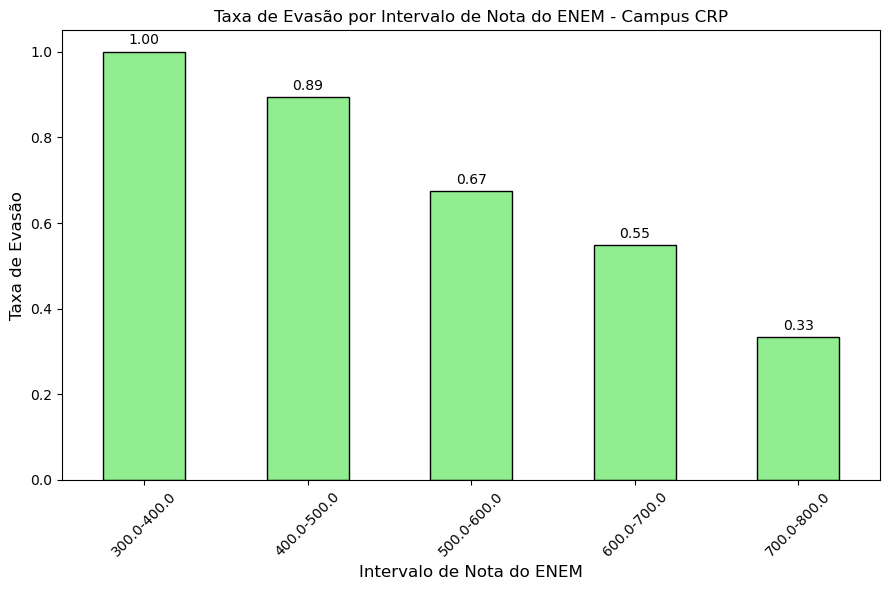

In [32]:
# Obter a lista de campus
campi = dados['Campus'].unique()

# Análise separada por campus
for campus in campi:
    # Filtrar os dados para o campus
    dados_campus = dados[dados['Campus'] == campus]
    
    # Filtrar os alunos com situação "Evasão" e calcular a taxa de evasão por intervalo de nota do ENEM
    evasao_campus = dados_campus[dados_campus['Situacao_Aluno_Agrupada'] == 'Evasão']
    taxa_evasao_campus = evasao_campus.groupby('Intervalo_ENEM').size() / dados_campus.groupby('Intervalo_ENEM').size()
    
    # Criar o gráfico de barras para a taxa de evasão por intervalo de nota do ENEM
    plt.figure(figsize=(9, 6))
    taxa_evasao_campus.plot(kind='bar', color='lightgreen', edgecolor='black')
    
    # Adicionar título e rótulos aos eixos
    plt.title(f'Taxa de Evasão por Intervalo de Nota do ENEM - Campus {campus}', fontsize=12)
    plt.xlabel('Intervalo de Nota do ENEM', fontsize=12)
    plt.ylabel('Taxa de Evasão', fontsize=12)
    
    # Adicionar os números acima das barras
    for i, v in enumerate(taxa_evasao_campus):
        plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=10)
    
    # Melhorar o layout
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Exibir o gráfico
    plt.show()

### 8️⃣ Qual a distribuição do Número de reprovações por situação (evasão, conclusão…)? 

#### Geral

Distribuição do Número de Reprovações por Situação do Aluno:
Situacao_Aluno_Agrupada  Conclusão  Evasão  Matriculado  Retenção
Num_Reprovacoes                                                  
0                              215      72           84        22
1                               99      49           55        14
2                               85      77           63        17
3                               63     112           53        10
4                               75     267           37        15
5                               59     162           45         6
6                               53     111           29         6
7                               43     111           17        15
8                               31     112            9         7
9                               32     107            5         4
10                              19      91            8         9
11                              23      95            6         9
12             

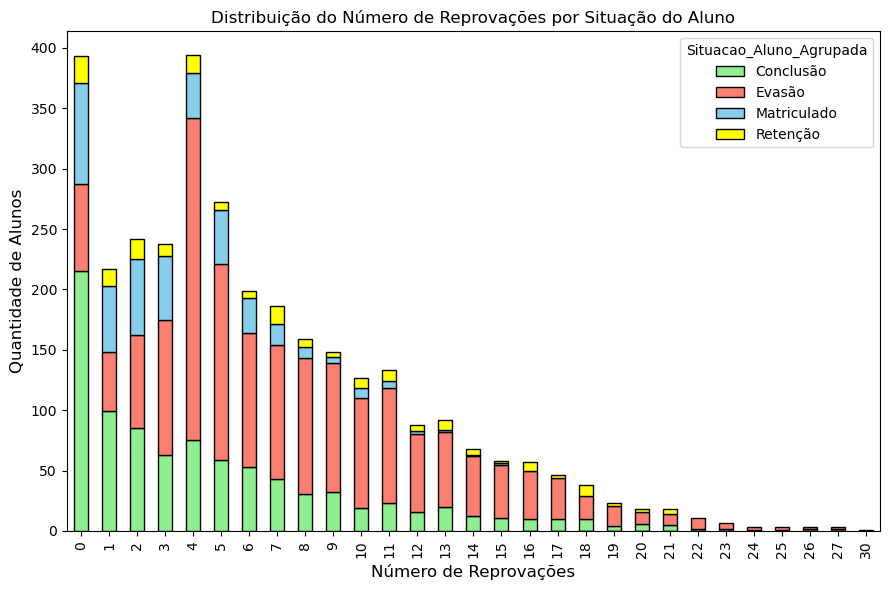

In [33]:
# Definir o dicionário de cores para cada situação
cores_situacao = {
    'Conclusão': 'lightgreen',
    'Matriculado': 'skyblue',
    'Evasão': 'salmon',
    'Retenção': 'yellow'
}

# Agrupar os dados pela coluna 'Num_Reprovacoes' e 'Situacao_Aluno_Agrupada'
reprovacao_situacao = dados.groupby(['Num_Reprovacoes', 'Situacao_Aluno_Agrupada']).size().unstack(fill_value=0)

# Exibir a distribuição no terminal
print("Distribuição do Número de Reprovações por Situação do Aluno:")
print(reprovacao_situacao)

# Criar o gráfico de barras empilhadas com as cores personalizadas
reprovacao_situacao.plot(kind='bar', stacked=True, figsize=(9, 6), edgecolor='black',
                         color=[cores_situacao.get(sit, 'gray') for sit in reprovacao_situacao.columns])

# Título e rótulos
plt.title('Distribuição do Número de Reprovações por Situação do Aluno', fontsize=12)
plt.xlabel('Número de Reprovações', fontsize=12)
plt.ylabel('Quantidade de Alunos', fontsize=12)

# Exibir o gráfico
plt.tight_layout()
plt.show()

#### Por campus


Distribuição do Número de Reprovações por Situação do Aluno - Campus CAV:
Situacao_Aluno_Agrupada  Conclusão  Evasão  Matriculado  Retenção
Num_Reprovacoes                                                  
0                              135      20           31         6
1                               59      13           15         4
2                               46      25           12         6
3                               26      17            6         2
4                               38      30            9         6
5                               26      49            6         1
6                               29      22            5         2
7                               24      17            3         5
8                               12      30            1         1
9                               19      35            0         2
10                              11      25            4         0
11                               9      19            3         5
1

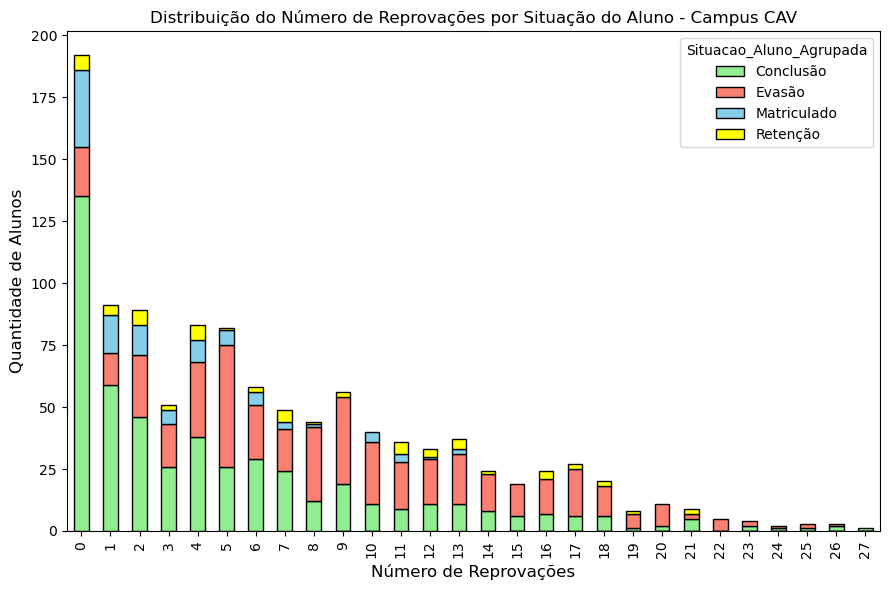


Distribuição do Número de Reprovações por Situação do Aluno - Campus CAF:
Situacao_Aluno_Agrupada  Conclusão  Evasão  Matriculado  Retenção
Num_Reprovacoes                                                  
0                               32      10           38        12
1                               11      13           21         3
2                               18      11           14         6
3                               11      18           14         3
4                                8      39           12         6
5                               11      49            8         1
6                                5      19            3         1
7                                7      25            4         7
8                                6      14            1         2
9                                2      19            1         0
10                               2      18            2         4
11                               4      19            1         1
1

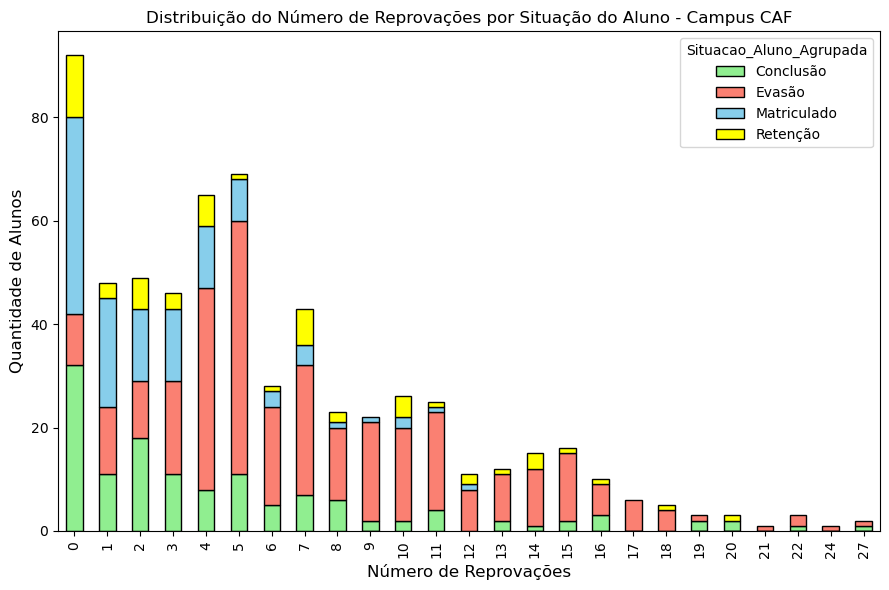


Distribuição do Número de Reprovações por Situação do Aluno - Campus CRP:
Situacao_Aluno_Agrupada  Conclusão  Evasão  Matriculado  Retenção
Num_Reprovacoes                                                  
0                               48      42           15         4
1                               29      23           19         7
2                               21      41           37         5
3                               26      77           33         5
4                               29     198           16         3
5                               22      64           31         4
6                               19      70           21         3
7                               12      69           10         3
8                               13      68            7         4
9                               11      53            4         2
10                               6      48            2         5
11                              10      57            2         3
1

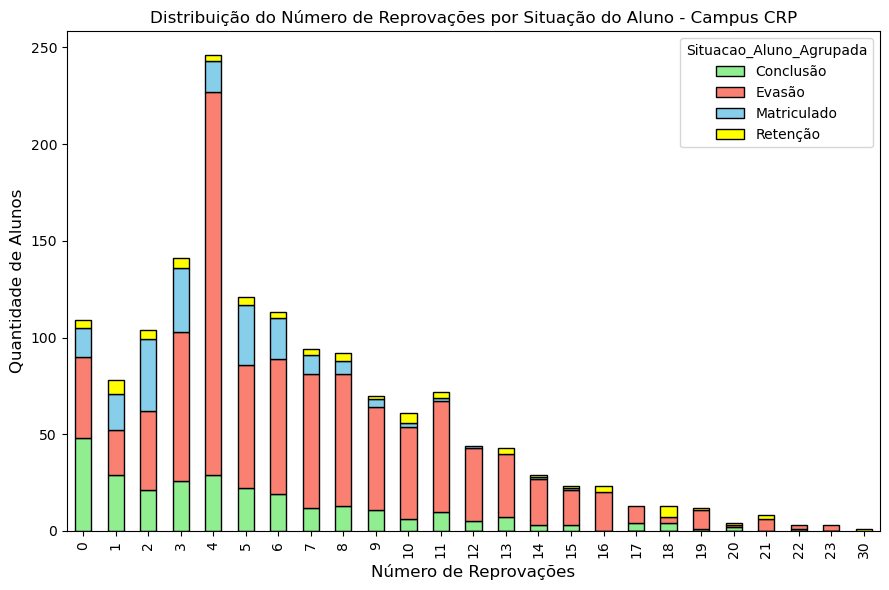

In [34]:
# Definir o dicionário de cores para cada situação
cores_situacao = {
    'Conclusão': 'lightgreen',
    'Matriculado': 'skyblue',
    'Evasão': 'salmon',
    'Retenção': 'yellow'
}

# Análise separada por campus
for campus in campi:
    # Filtrar os dados por campus
    dados_campus = dados[dados['Campus'] == campus]
    
    # Agrupar os dados pela coluna 'Num_Reprovacoes' e 'Situacao_Aluno_Agrupada'
    reprovacao_situacao_campus = dados_campus.groupby(['Num_Reprovacoes', 'Situacao_Aluno_Agrupada']).size().unstack(fill_value=0)
    
    # Exibir a distribuição no terminal
    print(f"\nDistribuição do Número de Reprovações por Situação do Aluno - Campus {campus}:")
    print(reprovacao_situacao_campus)
    
    # Criar o gráfico de barras empilhadas com as cores personalizadas
    reprovacao_situacao_campus.plot(kind='bar', stacked=True, figsize=(9, 6), edgecolor='black',
                                    color=[cores_situacao.get(sit, 'gray') for sit in reprovacao_situacao_campus.columns])
    
    # Título e rótulos
    plt.title(f'Distribuição do Número de Reprovações por Situação do Aluno - Campus {campus}', fontsize=12)
    plt.xlabel('Número de Reprovações', fontsize=12)
    plt.ylabel('Quantidade de Alunos', fontsize=12)
    
    # Exibir o gráfico
    plt.tight_layout()
    plt.show()

### 9️⃣ Qual a distribuição do CRA por situação (evasão, conclusão…)? (usar a coluna Intervalo_CRA) 

#### Geral

Distribuição do CRA por Situação do Aluno:
Situacao_Aluno_Agrupada  Conclusão  Evasão  Matriculado  Retenção
Intervalo_CRA                                                    
0-10                             0     322            2         0
10.0-20.0                        0     161            2         0
20.0-30.0                        0     231            4         2
30.0-40.0                        0     277           19         1
40.0-50.0                        3     293           41         9
50.0-60.0                       63     244           85        44
60.0-70.0                      261     136          102        52
70.0-80.0                      355      50           89        46
80.0-90.0                      205      20           60        22
90.0-100.0                      23       1           14         5


<Figure size 1200x600 with 0 Axes>

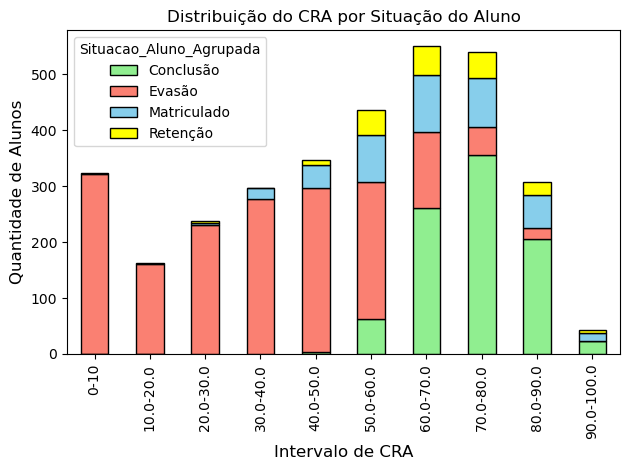

In [35]:
# Definir o dicionário de cores para cada situação
cores_situacao = {
    'Conclusão': 'lightgreen',
    'Matriculado': 'skyblue',
    'Evasão': 'salmon',
    'Retenção': 'yellow'
}

# Agrupar os dados pela coluna 'Intervalo_CRA' e 'Situacao_Aluno_Agrupada'
distribuicao_cra_situacao = dados.groupby(['Intervalo_CRA', 'Situacao_Aluno_Agrupada']).size().unstack(fill_value=0)

# Exibir a distribuição no terminal
print("Distribuição do CRA por Situação do Aluno:")
print(distribuicao_cra_situacao)

# Criar o gráfico de barras empilhadas com as cores personalizadas
plt.figure(figsize=(12, 6))
distribuicao_cra_situacao.plot(kind='bar', stacked=True, edgecolor='black', color=[cores_situacao.get(sit, 'gray') for sit in distribuicao_cra_situacao.columns])

# Título e rótulos
plt.title('Distribuição do CRA por Situação do Aluno', fontsize=12)
plt.xlabel('Intervalo de CRA', fontsize=12)
plt.ylabel('Quantidade de Alunos', fontsize=12)

# Exibir o gráfico
plt.tight_layout()
plt.show()

#### Por campus


Distribuição do CRA por Situação do Aluno - Campus CAV:
Situacao_Aluno_Agrupada  Conclusão  Evasão  Matriculado  Retenção
Intervalo_CRA                                                    
0-10                             0      47            0         0
10.0-20.0                        0      22            0         0
20.0-30.0                        0      61            0         0
30.0-40.0                        0      67            3         0
40.0-50.0                        2      93            9         2
50.0-60.0                       38      77           10        18
60.0-70.0                      126      46           19        16
70.0-80.0                      189      17           30        12
80.0-90.0                      132      11           20         7
90.0-100.0                      17       0            7         3


<Figure size 1200x600 with 0 Axes>

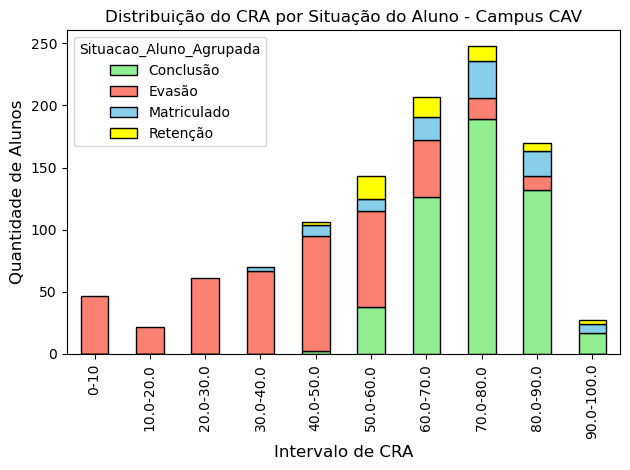


Distribuição do CRA por Situação do Aluno - Campus CAF:
Situacao_Aluno_Agrupada  Conclusão  Evasão  Matriculado  Retenção
Intervalo_CRA                                                    
0-10                             0      76            0         0
10.0-20.0                        0      24            0         0
20.0-30.0                        0      42            0         1
30.0-40.0                        0      51            3         1
40.0-50.0                        1      47            6         2
50.0-60.0                       10      47           19         9
60.0-70.0                       34      21           26        14
70.0-80.0                       55       6           31        19
80.0-90.0                       28       2           28         9
90.0-100.0                       3       1            7         1


<Figure size 1200x600 with 0 Axes>

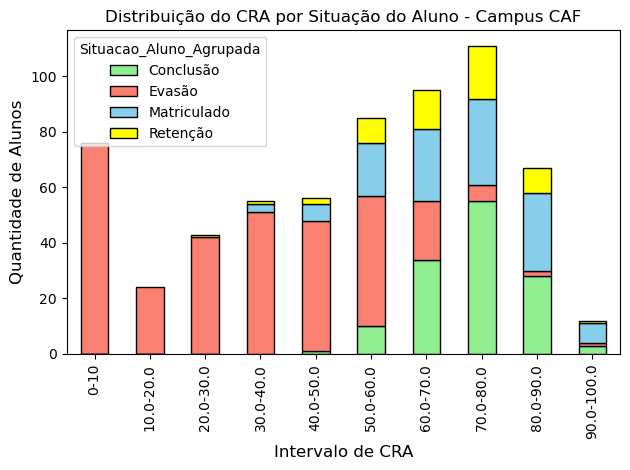


Distribuição do CRA por Situação do Aluno - Campus CRP:
Situacao_Aluno_Agrupada  Conclusão  Evasão  Matriculado  Retenção
Intervalo_CRA                                                    
0-10                             0     199            2         0
10.0-20.0                        0     115            2         0
20.0-30.0                        0     128            4         1
30.0-40.0                        0     159           13         0
40.0-50.0                        0     153           26         5
50.0-60.0                       15     120           56        17
60.0-70.0                      101      69           57        22
70.0-80.0                      111      27           28        15
80.0-90.0                       45       7           12         6
90.0-100.0                       3       0            0         1


<Figure size 1200x600 with 0 Axes>

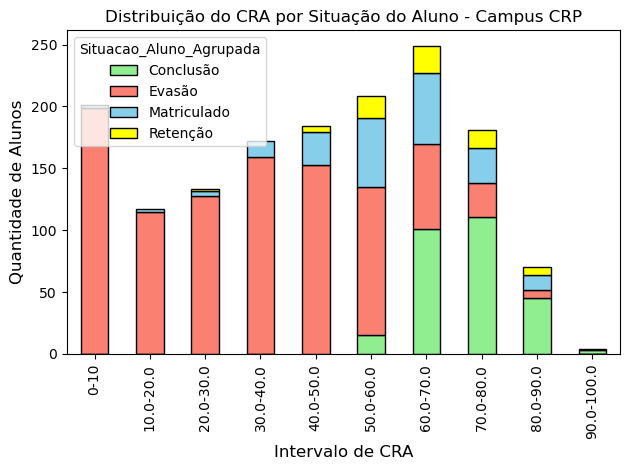

In [36]:
# Definir o dicionário de cores para cada situação
cores_situacao = {
    'Conclusão': 'lightgreen',
    'Matriculado': 'skyblue',
    'Evasão': 'salmon',
    'Retenção': 'yellow'
}

# Listar os três campus
campi = dados['Campus'].unique()

# Análise separada por campus
for campus in campi:
    # Filtrar os dados por campus
    dados_campus = dados[dados['Campus'] == campus]
    
    # Agrupar os dados pela coluna 'Intervalo_CRA' e 'Situacao_Aluno_Agrupada'
    distribuicao_cra_situacao = dados_campus.groupby(['Intervalo_CRA', 'Situacao_Aluno_Agrupada']).size().unstack(fill_value=0)
    
    # Exibir a distribuição no terminal
    print(f"\nDistribuição do CRA por Situação do Aluno - Campus {campus}:")
    print(distribuicao_cra_situacao)
    
    # Criar o gráfico de barras empilhadas com as cores personalizadas
    plt.figure(figsize=(12, 6))
    distribuicao_cra_situacao.plot(kind='bar', stacked=True, edgecolor='black', color=[cores_situacao.get(sit, 'gray') for sit in distribuicao_cra_situacao.columns])
    
    # Título e rótulos
    plt.title(f'Distribuição do CRA por Situação do Aluno - Campus {campus}', fontsize=12)
    plt.xlabel('Intervalo de CRA', fontsize=12)
    plt.ylabel('Quantidade de Alunos', fontsize=12)
    
    # Exibir o gráfico
    plt.tight_layout()
    plt.show()

### 🔟 Quais são as correlações entre os dados (matriz de correlação)?

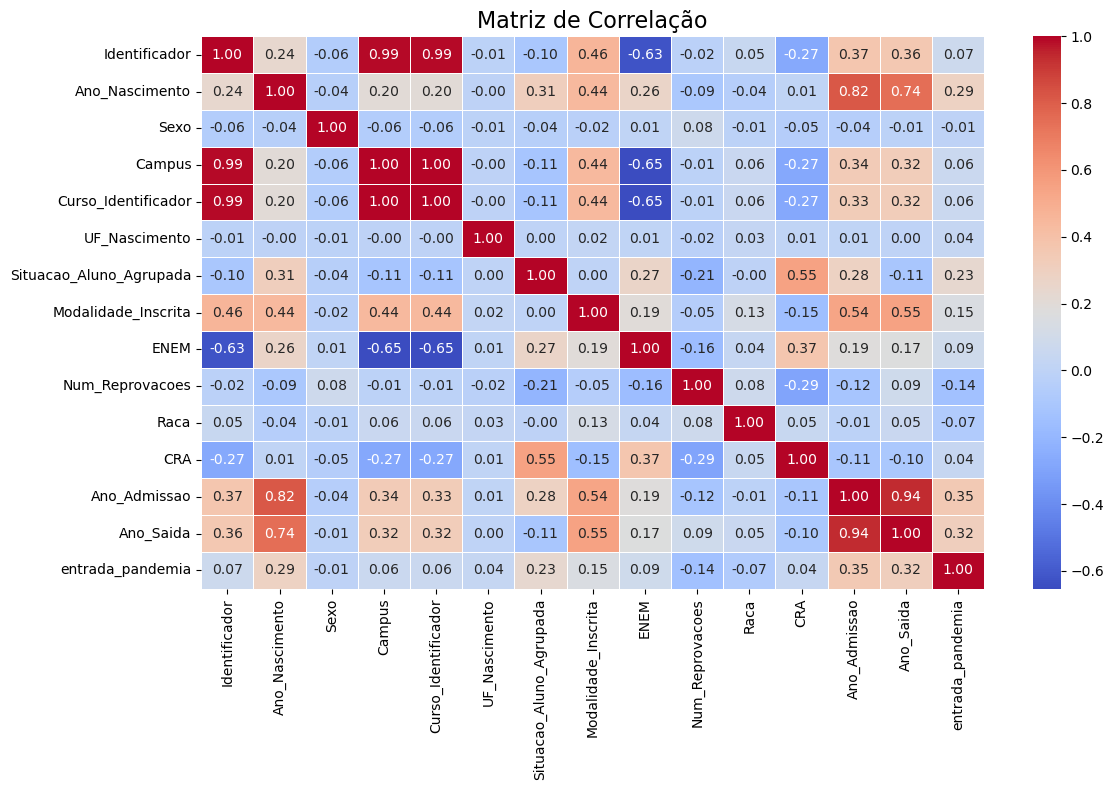

In [37]:
# Codificação das colunas
dados['Sexo'] = dados['Sexo'].map({'M': 1, 'F': 0})
dados['Campus'] = dados['Campus'].map({'CAV': 0, 'CAF': 1, 'CRP': 2})
dados['Situacao_Aluno_Agrupada'] = dados['Situacao_Aluno_Agrupada'].map({'Conclusão': 1, 'Evasão': 0, 'Matriculado': 2, 'Retenção': 3})
dados['entrada_pandemia'] = dados['entrada_pandemia'].map({'Sim': 1, 'Nao': 0})

# Para a coluna 'UF_Nascimento', podemos usar a codificação numérica ou One-Hot Encoding
# Para uma codificação numérica simples, vou mapear cada UF para um número
uf_map = {uf: idx for idx, uf in enumerate(dados['UF_Nascimento'].dropna().unique())}
dados['UF_Nascimento'] = dados['UF_Nascimento'].map(uf_map)

# Para a coluna 'Raca', você pode usar uma codificação de rótulos ou One-Hot Encoding
raca_map = {'Pardo(a)': 0, 'Informação não disponível': 1, 'Branco(a)': 2, 'Preto(a)': 3, 'Amarelo(a)': 4, 'Indígena': 5}
dados['Raca'] = dados['Raca'].map(raca_map)

# Selecionar apenas as colunas numéricas
dados_numericos = dados.select_dtypes(include=['float64', 'int64'])

# Calcular a matriz de correlação
correlacao = dados_numericos.corr()

# Exibir a matriz de correlação
# print(correlacao)

plt.figure(figsize=(12, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação', fontsize=16)
plt.tight_layout()
plt.show()